<a name="cell-TOC-f"></a>

### 5. [Representating Functions](#cell-f)

  0. [Function (Vector) Spaces](#cell-f-concept)  
     0. [Inner (dot) Products](#cell-f-def-dot)
     1. [[OMITTED] Norms](#cell-f-def-norm)
       - [[OMITTED] Matrix Norms](#cell-f-def-metric-matrix)
     2. [[OMITTED] Metrics](#cell-f-def-metric)
     3. [[REVIEW] Linear Independence, Orthogonality, and Basis Sets](#cell-f-def-basis)
  1. [Fourier Coefficients](#cell-f-def-fourier-coefs)
     0. [[OMITTED] Convergence Terminology](#cell-f-def-convergence)  

  1. [Polynomial Bases$\;$](#cell-f-poly) 
    0. [Linearly Independent Bases: Taylor Series and the Monomials](#cell-f-poly-lindep)  
       - [Laplace (Taylor Series) Approximation](#cell-f-examples)
    0. [Standard (Orthogonal) Bases](#cell-f-poly-Legendre)
      - [Comparing Bases: Legendre versus Laguerre Polynomials for](#cell-f-examples-lpolys) [$e^{-x}$](#cell-f-examples-lpolys)
      - [[OMITTED] The Three-Term Recurrence Relation for Evaluating](#cell-f-poly-eval) [$ f(x)$](#cell-f-poly-eval)
      - [[OMITTED] The Christoffel-Carboux Formula for Evaluating](#cell-f-poly-eval) [$ f(x)f(y)$](#cell-f-poly-eval-ccf)
      - [[OMITTED] Details and Examples](#cell-f-poly-sob)
          - [[OMITTED] Legendre Polynomials](#cell-f-poly-Legendre) [$P_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Chebyshev Polynomials](#cell-f-poly-Legendre) [$T_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Jacobi Polynomials](#cell-f-poly-Legendre) [$Q_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Laguerre Polynomials](#cell-f-poly-Legendre) [$L_k^{(\alpha-1)}$](#cell-f-poly-Legendre)
          - [[OMITTED] Chebyshev-Hermite Polynomials](#cell-f-poly-Legendre) [$H_k^e$](#cell-f-poly-Legendre)
          - [[OMITTED] Hermite Polynomials](#cell-f-poly-Legendre) [$H_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Hermite Exponentially Tilted Polynomial Functions](#cell-f-poly-Legendre)
          - [[OMITTED] Density Approximation with Chebyshev-Hermite Polynomials](#cell-f-examples-gram)
          - [[OMITTED] Gram–Charlier and Edgeworth Series and Cornish-Fisher Expansion](#cell-f-examples-gram)

  3. [Data Smoothing / Prediction](#cell-sovling-datasmoothing): ~~Week 5 Programming Assignment Problem 1~~
     0. [Linear Model Regression](#cell-sovling-datasmoothing-lm)
     0. [Spline Basis Functions](#cell-f-examples-spline)
     1. [Smoothing Matrices](#cell-sovling-smoothing)
     2. [Backfitting Additive Regression Models](#cell-sovling-backfitting)
     3. [Regularization](#cell-sovling-regularization)
        - [[OMITTED] Shrinkage and Bayesian Prior Regularization](#cell-sovling-shrinkage)
        - [[OMITTED] Generalizability, Model Complexity, and Underfitting and Overfitting](#cell-sovling-underoverfitting)
        - [[OMITTED] Generalizability, Model Complexity, and the Variance-Bias Tradeoff](#cell-sovling-bias-variance)
     4. [Deep Neural Networks (DNNs)](#cell-f-dnn)

  4. [Fourier Series and Transforms](#cell-f-fourier)
    0. [Truncated Fourier Series Basis Expansions](#cell-f-fourier-bases)
    1. [Characteristic and Moment Generating Functions](#cell-f-fourier-transform-rational)
    2. [The Convolution Theorem](#cell-f-fourier-convolution-theorem)
    3. ["Circular" Convolutions](#cell-f-fourier-convolution-theorem-circular)
    4. [Discrete Fourier Transform (DFT)](#cell-f-fourier-transform)
    5. [Transformation Applicability](#cell-f-fourier-transforms)
    6. [Primitive n<sup>th</sup> Roots of Unity](#cell-f-fourier-nthroots)
    7. [Fast Fourier Transform (FFT)](#cell-f-fourier-fft): ~~Week 5 Programming Assignment Problem 2~~
  

> "Programming is only learned by programming. (Read that again.)"
>
> -- James E. Gentle
> 
> Section 3.5 **Programming** in Chapter 3 **Algorithms and Programming** of **Computational Statistics**, page 134.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
# https://patsy.readthedocs.io/en/latest/spline-regression.html
from patsy import dmatrix, bs, build_design_matrices
plt.style.use('seaborn-colorblind')

import statsmodels.api as sm
from scipy import stats
import scipy
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
from scipy.interpolate import interp1d
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error   
from sklearn.model_selection import GridSearchCV

from IPython.display import YouTubeVideo

<a name="cell-f"></a>
# 5. Representing Functions ([Return to TOC](#cell-TOC-f)) 
---


Just as a three dimensional point $v=(x,y,z)$ can be represented as

$$x \cdot \left[\begin{array}{c}1\\0\\0\end{array}\right]
+ y \cdot \left[\begin{array}{c}0\\1\\0\end{array}\right]
+ z \cdot \left[\begin{array}{c}0\\0\\1\end{array}\right]
= \sum_{k=0}^2 v_k b_k
$$

an element in second order polynomial ***function space*** can be represented as 

$$\text{second order polynomial } f(x) = \sum_{k=0}^2 c_k x^k$$

where $x^k$ is a ***basis function*** just as $b_k = e_k$ is a (standard) ***basis vector*** so that $b_k$ and $x^k$ are analagously the axes on which the coordinates $v_k$ and $c_k$ are respectively located. Thus, each function in a ***function space*** is just a coordinate or ***vector***. 

> The perspective that a function is a point in space suggests that 
> - similarly to how ***PCA*** provides a lower dimensional representation of a data set
- or just as ${\rm I\!R}$ are is inevitably approximated with available representations in ${\rm I\!F}$
> 
> so too might it be expeditious to represent a function $f(x)$ with a reduced representation through a truncated approximation of simpler composite components.
>
> Indeed, many functions $f(x)$ can be well ***approximated*** as weighted sum of well-chosen ***basis functions***. The optimial weights of such a representation are known as ***Fourier coefficients***. This is of course of interest when an approximation of a function may provide good tradeoffs between accuracy requirements and the computational cost of evaluating $f(x)$ exactly.


<a name="cell-f-concept"></a>

# 5.0 Function (Vector) Spaces ([Return to TOC](#cell-TOC-f)) 

---

The set of $x \in {\rm I\!R}^d$
- may be ***added*** and ***scaled*** and are unaltered by the ***additive identity element***
- and may be operated upon with ***inner product***, ***norm***, and ***metric*** operations 

and thus forms a ***vector space***. But ***function spaces*** also support these operations and thus are also ***vector spaces***. 

<a name="cell-f-def-dot"></a>

## 5.0.0 Inner (dot) Products ([Return to TOC](#cell-TOC-f)) 
---

The ***Inner*** (***dot***) ***product*** (for functions)
    
\begin{align*}\langle f,g \rangle & {} =  \int_D f(x)g(x)dx && \left[ \text{like }\langle x,y \rangle = \sum_i x_iy_i = x^Ty \right]\\
  \text{or } \mathbf{\langle f,g \rangle} & {} =  \mathbf{\int_D f(x)g(x)w(x)dx} && \left[ \text{like } \underset{\text{product dot}}{\overset{\text{elliptical}}{x^T Wy}}  \text{ for weight function } w(x) \right]\\
  \text{satisfies} & {} \quad \langle x,x \rangle \geq 0 && \text{(nonnegativity)} \\
   & {} \quad \langle x,0 \rangle = \langle 0,x \rangle = \langle 0,0 \rangle =  0 && \text{(additive identity element absorption)} \\  
   & {} \quad \langle x,y \rangle = \langle y,x \rangle  && \text{(commutativity)} \\  
   & {} \quad \langle ax,y \rangle = a\langle x,y \rangle, a \in {\rm I\!R}  && \text{(scalar factorization)} \\  
   & {} \quad \langle x+y,z \rangle = \langle x+z,y+z \rangle && \text{(distributive addition)} \\  
   & {} \quad |\langle x,y \rangle| \leq \langle x,x \rangle^{\frac{1}{2}} \langle y,y \rangle^{\frac{1}{2}} && \text{(Cauchy-Schwarz inequality)} \\  
  \end{align*}

where the integrals must exist, and complex numbers require [***complex inner products***](https://en.wikipedia.org/wiki/Inner_product_space#Hilbert_space) based on [***complex conjugates***](https://en.wikipedia.org/wiki/Complex_conjugate), i.e., $\langle f,g \rangle =  \int_D f(x)\overline{g(x)}w(x) dx$.

<a name="cell-f-def-norm"></a>

## 5.0.1 [OMITTED] Norms and Matrix Norms ([Return to TOC](#cell-TOC-f)) 
---

A ***Norm*** $||\cdot||$ measures element "size" and satisfies
    
\begin{align*}
  ||x|| & \geq {} 0 & & \text{(nonnegativity)} \\
  ||0|| & = {} 0 & & \text{(identity element, relaxed for non-measurable sets for functions)} \\
  ||ax|| & = {} |a|||x||, a \in {\rm I\!R} & & \text{(scalar factorization)} \\
  ||x+y|| & \leq {} ||x||+||y|| & & \text{(triangle inequality)} \\
|\langle x,y \rangle | & \leq {} ||x||\times||y|| & & \text{(re-expressed Cauchy-Schwarz inequality)} 
\end{align*}

These requirements are satisfied by the ubiquitous $L_p$ ***norms***

$$||x||_p = \left( \left\langle |x|^{\frac{p}{2}}, |x|^{\frac{p}{2}} \right\rangle \right)^{\frac{1}{p}}$$
  
E.g., $||f||_2^2 = \int_D f(x)^2w(x)dx < \infty$ defines the ***vector space*** of ***squared-integrable functions***, $f \in L^2(D)$. And another ***norm*** commonly observed for functions is the ***Chebyshev*** or ***uniform norm*** $L_\infty$ $||f||_\infty = \underset{p \rightarrow \infty}{\lim} ||f||_p =\, $[$\underset{D}{\sup}$](https://math.stackexchange.com/questions/160451/difference-between-supremum-and-maximum) $|f(x)w(x)|$

> The "roughness" or "variation" of a function as measured by
>
> $$\int_D \left( f(x) - \int_D f(x)dx\right)^2 dx $$ 
>
> for density functions $f$ with unit mass can be characterized by the dominating term
>
> $$||f(x)||_2^2$$
>
> Alternatively, another "roughness" measure could be $||f''(x)||_2^2$ (upon which the ***regularization term*** of [***cubic smoothing splines***](#cell-sovling-smoothing) is based) since the second derivative of the function $f(x)$ measures how quickly the instantaneous slope changes and so this provides a measure of "smoothness" of $f(x)$.

<a name="cell-f-def-metric-matrix"></a>

### [OMITTED] Matrix Norms ([Return to TOC](#cell-TOC-f))
---

In addition to the required properties above, ***matrix norms*** are often chosen to additionally satisfy 

\begin{align*}
||AB|| \leq {} & ||A||\! \cdot \!||B|| && \text{(a consistency property)}
  \end{align*}

e.g., as in the case of the ***induced matrix norm*** $M$ for ***vector norm*** $v$

$$||A||_M = \underset{x\not=0}{\max} \frac{||Ax||_v}{||x||_v} \quad \underset{\text{since $||x||_v > 0$}}{\Longrightarrow} \quad ||Ax||_v \leq ||x||_v ||A||_M $$

> Since matrices can be viewed as ***linear operators*** which transform vectors into other vectors 
> > just as derivatives are ***linear operators*** which transform vectors (functions) into other vectors (functions)
> 
> then just as there are ***norms*** for ***matrices*** and ***functions***, so too are there ***norms*** for ***operators***. 

<a name="cell-f-def-metric"></a>

## 5.0.2 [OMITTED] Metrics ([Return to TOC](#cell-TOC-f)) 
---

A ***Metric*** measures "distance" between two elements and satisfies

\begin{align*}
  \Delta(x,y) & \geq {} 0 & & \text{(nonnegativity)} \\
  \Delta(x,x) & = {} 0 & & \text{(equality identity)} \\
  \Delta(x,y)  & = {} \Delta(y,x)  & & \text{(commutitivity)} \\
  \Delta(x,z) & \leq {} \Delta(x,y) + \Delta(y,z) & & \text{(triangle inequality)} 
\end{align*}

These requirements are met by the ubiquitous $L_p$ ***metrics***

$$\Delta_p(x,y) = ||x-y||_p$$


A notable measure that is often used in place of a ***metric*** when comparing two statistical distributions (i.e., a particular class of functions) is ***Kullback–Leibler (KL) divergence***.  

$$D_{\text{KL}}(P\parallel Q) = \int_{-\infty}^{\infty} p(x)\log \left({\frac {p(x)}{q(x)}}\right) dx $$

***KL divergence*** is **not** a ***metric*** because it's not symmetric and as well does not satisfy the triangle inequality.

> For vectors in ${\rm I\!R}^d$
> $$\Delta_2^A(x,y) = \overset{\large \text{the elliptical metric}}{\sqrt{(x-y)^TA(x-y)}} \quad \text{ generalizes } \quad \Delta_2 = \overset{\large \text{the Euclidean metric}}{\sqrt{(x-y)^T(x-y)}}$$
>
> just as $L_2^A \equiv ||\cdot||_2^A$ generalizes ***euclidean norm*** $L_2 \equiv ||\cdot||_2$.  And when $A = \Sigma^{-1}$ (the inverse of a covariance matrix) the ***elliptical metric*** is called ***Mahalanobis distance*** .  
- ***Squared Mahalanobis distance*** is not a ***metric*** because it won't satisfy the triangle inequality; nonetheless, ***Squared Mahalanobis distance*** is often just referred to as ***Mahalanobis distance***.
>
> Since the ***inner (dot) product*** for functions already includes the weight fuction $w(x)$, ***function metrics*** are already generalized analogously to ***elliptical distance***.  And since the weight function $w(x)$ is usually specified to be a density function, ***function norms*** also generalize ***Mahalanobis distance*** from characterizing distance with respect to the shape of a multivariate normal distribution, to characterizing the distance with respect to any density $w(x)$. 

<a name="cell-f-def-basis"></a>

## 5.0.3 [REVIEW] Linear Independence, Orthogonality, and Basis Sets ([Return to TOC](#cell-TOC-f)) 
---

***Linear independence*** of ***vector space*** elements $\{v_k: k = 0, \cdots, d\}$ means only when $a_0 = a_1 = \cdots = a_d = 0$ does 

$$a_0v_0 + a_1v_1 + \cdots + a_dv_d = 0 \quad \text{(or "almost everywhere" for functions)}$$

> The ***monomials***: $1, x, x^2, ...$ are ***linearly independent***.

A ***basis set*** for ***vector space*** $\mathcal X$ is a ***linear independent*** set of elements $\mathcal B = \{b_k \in \mathcal X: k = 0, \cdots, d\}$ which is a ***generating*** or ***spanning set*** of $\mathcal X$ so that any $x \in \mathcal X$ can be formed as a linear combination of the elements in $\mathcal B$.
  
> The  ***monomials*** up to $x^d$ $x = \sum_k a_k x^k$ form a ***basis set*** for the ***function*** (i.e., ***vector***) ***space*** of all polynomial functions of order $d$ or less.

***Orthonormal vectors*** are denoted as $x_1 \perp x_2$ and are ***orthogonal*** so $\langle x_1, x_2 \rangle = 0$ and  ***normalized*** so  $||x_1|| = ||x_2|| = 1$. ***Orthogonal vectors*** are necessarily ***linearly independent***, but not all ***linearly independent*** vectors are ***orthogonal***.

> The ***monomials*** $1$ and $x$ are ***orthogonal*** over $[-1,1]$ for constant weight function $w(x)$ since $\langle 1, x \rangle = \int_{-1}^1 x dx  = 0$.

- **Terminology Warning**: if $x \in {\rm I\!R}^d$ is ***normalized*** then $||x||=1$ and $x$ is called a ***normal vector***; however, if $||f||_p=1$ for $f \in L^p$ (***Lebesgue***) space then $f$ is called ***normalized*** but it is **not** referred to as a "normal function". Instead, in the $L^p$ context, the term "normal function" is reserved for density functions $p(x)$ and weight functions $w(x)$ with unit mass, and $p(x)$ and $w(x)$ are **not** colloquially referred to as "normalized" functions since, e.g., it's generally the case that $||w||_p \not = 1$ even if $w(x)$ is a density functions with unit mass.  

<a name="cell-f-def-fourier-coefs"></a>

# 5.1 Fourier Coefficients ([Return to TOC](#cell-TOC-f)) 
---

For an ***orthogonal basis*** $\{b_k\}$ of vector space $\mathcal X$, $f \in \mathcal X$ may be represented as 

$$f = \sum_k \langle f, b_k \rangle b_k$$ 

with the ***Fourier coefficients*** $\{\langle f, b_k \rangle\}$, and for any approximation of $f$ based on a finite subset of $\{b_k\}$, the ***Fourier coefficients*** give the smallest possible ***squared error***  

$$|| f - \sum_{k=0}^d  \langle f, b_k \rangle b_k ||_2^2 \leq || f - \sum_{k=0}^d  a_kb_k ||_2^2$$

Further, since

\begin{align*}||f||_2^2 = & {} \left \langle \sum_k \langle f, b_k \rangle b_k, \sum_k \langle f, b_k \rangle b_k \right \rangle \\
  = & {}  \sum_{k,k'} \big \langle \langle f, b_k \rangle b_k , \langle f, b_{k'} \rangle b_{k'} \big \rangle \\
  = & {}  \sum_{k} \big \langle \langle f, b_k \rangle b_k , \langle f, b_{k} \rangle b_{k} \big \rangle \\
  = & {}  \sum_{k} \langle f, b_k \rangle^2
\end{align*}
  
***Bessel's inequality***

$$\sum_{k=0}^d  \langle f, b_k \rangle^2\leq \sum_{k=0}^\infty \langle f, b_k \rangle^2 = ||f||_2^2$$

which is useful for showing convergence of sequences of elements in a ***function space*** is obvious.

<a name="cell-f-def-convergence"></a>

## 5.1.0 [OMITTED] Convergence Terminology ([Return to TOC](#cell-TOC-f)) 
---

For $f$ in ${\rm I\!R}^d$ or $L^2$ we have that $\underset{d\rightarrow \infty}{\lim} \sum_{k=0}^d  \langle f, b_k \rangle b_k = \underset{d\rightarrow \infty}{\lim} f_d \rightarrow f$ because

  - the finite dimensional vector space ${\rm I\!R}^d$ and the ***space of square-integrable functions*** $L^2$ are ***Hilbert spaces***
  - a ***Hilbert space*** is a ***closed Banach space*** with a norm based on an inner product 
  - a ***closed space*** contains all it's limit points 
  - a ***Banach space*** is a ***complete space*** with a norm  
  - in a ***complete space*** every ***Cauchy sequence converges uniformly*** to a member in the space
  - a ***sequence*** is ***Cauchy*** if for $\epsilon>0$ there is an $M$ such that $||f_i-f_j|| < \epsilon$ for all $i,j \geq M$
  - a ***sequence converges uniformly*** to $f$ if for $\epsilon>0$ there is an $M$ such that $||f_i(x)-f(x)||$ for all $i \geq M$ and all $x$

<a name="cell-f-poly"></a>

# 5.2 Polynomial Bases ([Return to TOC](#cell-TOC-f)) 

---

This section presents polynomials as specific examples of basis functions, emphasizes their characteristics as basis functions, and demonstrates some applications where they are used.

<a name="cell-f-poly-lindep"></a>

## 5.2.0 Linearly Independent Bases: Taylor Series and the Monomials ([Return to TOC](#cell-TOC-f)) 

---

The ***monomials*** $\{1, x, x^2, ...\} = \{x^k: k=0,1,...\}$ are a set of ***linearly independent*** elements of a function space that form a ***basis*** $\{b_k\}$ for [***analytic functions***](https://en.wikipedia.org/wiki/Analytic_function) which have a ***Taylor series expansion***

$$f(x) = \underset{f^{(k)} \text{ is the } k^{th} \text{ derivative of } f}{\sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^i}\quad \text{ with } \quad \underset{\text{where the truncated sum }\textbf{approximates } f}{f(x) \approx \sum_{k=0}^{K} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^i}$$

The coefficients for the ***monomial basis*** produced by the ***Taylor series approximation*** 

- are not equal to $c_k = \langle f, b_k\rangle$
- for an ***orthogonal bases*** $\{b_k\}$ 

so they do not represent an $L_2$-optimal ***approximation*** for $f(x)$ and so we do not have  

$$ \left|\left|f(x) - \sum_{k=0}^{K} c_k b_k \right|\right|_2 \;\leq\; \left|\left|f(x) - \sum_{k=0}^{K} a_k b_k \right|\right|_2 $$

although, the ***approximation*** may be good for $x$ near $x_0$.

> Just as ***linearly independent*** vectors may be ***orthogonalized*** ***Gram-Schmidt orthogonalization process***, so too may basis functions be ***orthogonalized*** using a ***Gram-Schmidt orthogonalization process*** (for functions). 

<a name="cell-f-examples"></a>

### Laplace (Taylor Series) Approximation ([Return to TOC](#cell-TOC-f)) 

---

For ***nonnegative differentiable*** and ***concave*** $f$, since $\log$ is ***monotonically increasing***

$$g(x) = \log(f(x)) \quad \text{satifies} \quad f'(x^*)=0=g'(x^*)$$ 

so that the ***second order Taylor series approximation*** of $g(x)$ around $x^* = \text{argmax } g(x) = \text{argmax } f(x)$ gives

$$ f(x) \approx \underbrace{\exp \left( g(x^*) + g''(x^*)\frac{(x-x^*)^2}{2}\right)}_{\text{a so-called }\textbf{exponentially tilted measure } \longrightarrow} = \exp(g(x^*)) \left(\frac{-g''(x^*)}{2\pi}\right)^{-\frac{1}{2}}\text{N}\!\left(x^*, -g''(x^*)^{-1}\right) $$

from which we immediately have the ***Laplace approximation*** of the integral

$$\begin{align*}
\int^\infty_{-\infty} f(x) dx \approx {} & \exp(g(x^*)) \left(\frac{-g''(x^*)}{2\pi}\right)^{-\frac{1}{2}}\\
= {} & f(x^*) \left(\frac{-\frac{d^2}{dx^2}\log(f(x^*))}{2\pi}\right)^{-\frac{1}{2}}
\end{align*}$$

In [2]:
# f = N(0,2)
# g(x) = log(f(x)) = c - 1/2var(x-x*)^2
# ~g(x) = g(x*) + g'(x*)(x-x*) + g''(x*)(x-x*)^2/2
# exp(~g(x)) ~= f(x)
# g'(x*) = 0 (by construction)
# g''(x) = d2/x2 -1/2var(x-x*)^2 = d/dx -(x-x*)/var = -1/var
stats.norm(scale=2).pdf(0) * (-(-1/4)/(2*np.pi))**(-0.5)
# a very good approximation!

In [1]:
integrate.quad(lambda x: stats.norm(0,2).pdf(x), -10, 10)
# as the area of a probability density function is of course one!

*This example is inspired by the **Expansion in Monomials** section of Chapter 4.2 **Basis Sets in Function Spaces** on pages 160-161 of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: equations 4.21 and 4.22 incorrectly write $g'(x_0)$ when this should be $g(x_0)$, as in equation 4.23; and, equation 4.22 fails to include a normalizing constant, which is again corrected in equation 4.23.]*

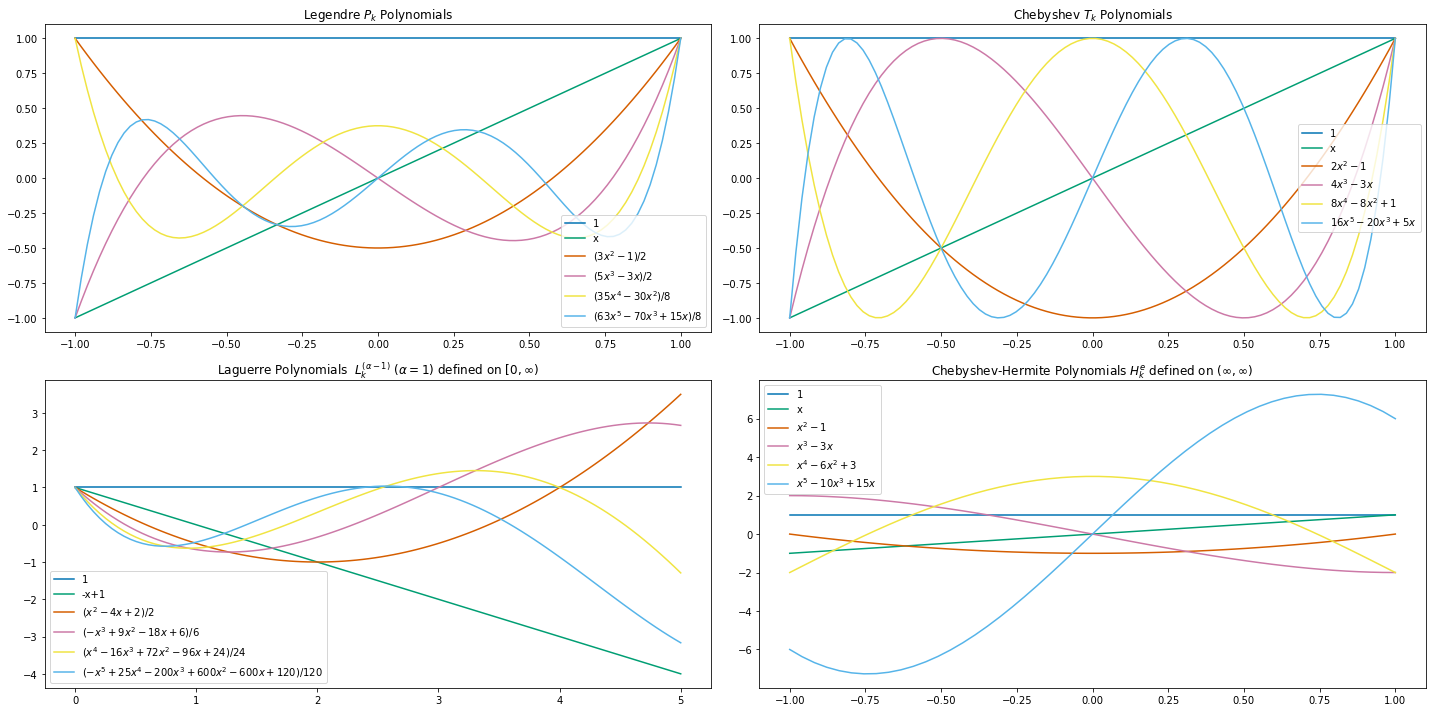

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

domain = np.linspace(-1,1,100)
ax[0,0].plot(domain, 1+0*domain, label='1')
ax[0,0].plot(domain, domain, label='x')
ax[0,0].plot(domain, (3*domain**2-1)/2, label='$(3x^2-1)/2$')
ax[0,0].plot(domain, (5*domain**3-3*domain)/2, label='$(5x^3-3x)/2$')
ax[0,0].plot(domain, (35*domain**4-30*domain**2+3)/8, label='$(35x^4-30x^2)/8$')
ax[0,0].plot(domain, (63*domain**5-70*domain**3+15*domain)/8, label='$(63x^5-70x^3+15x)/8$')
ax[0,0].set_title('Legendre $P_k$ Polynomials')
ax[0,0].legend()

domain = np.linspace(-1,1,100)
ax[0,1].plot(domain, 1+0*domain, label='1')
ax[0,1].plot(domain, domain, label='x')
ax[0,1].plot(domain, 2*domain**2-1, label='$2x^2-1$')
ax[0,1].plot(domain, 4*domain**3-3*domain, label='$4x^3-3x$')
ax[0,1].plot(domain, 8*domain**4-8*domain**2+1, label='$8x^4-8x^2+1$')
ax[0,1].plot(domain, 16*domain**5-20*domain**3+5*domain, label='$16x^5-20x^3+5x$')
ax[0,1].set_title('Chebyshev $T_k$ Polynomials')
ax[0,1].legend()

domain = np.linspace(0,5,100) # [0, infinity)
ax[1,0].plot(domain, 1+0*domain, label='1')
ax[1,0].plot(domain, -domain+1, label='-x+1')
ax[1,0].plot(domain, (domain**2-4*domain+2)/2, label='$(x^2-4x+2)/2$')
ax[1,0].plot(domain, (-domain**3+9*domain**2-18*domain+6)/6, label='$(-x^3+9x^2-18x+6)/6$')
ax[1,0].plot(domain, (domain**4-16*domain**3+72*domain**2-96*domain+24)/24, label='$(x^4-16x^3+72x^2-96x+24)/24$')
ax[1,0].plot(domain, (-domain**5+25*domain**4-200*domain**3+600*domain**2-600*domain+120)/120, label='$(-x^5+25x^4-200x^3+600x^2-600x+120)/120$')
ax[1,0].set_title('Laguerre Polynomials  $L_k^{(\\alpha-1)}$ ($\\alpha=1$) defined on $[0,\infty)$')
ax[1,0].legend()

domain = np.linspace(-1,1,)
ax[1,1].plot(domain, 1+0*domain, label='1')
ax[1,1].plot(domain, domain, label='x')
ax[1,1].plot(domain, domain**2-1, label='$x^2-1$')
ax[1,1].plot(domain, domain**3-3*domain, label='$x^3-3x$')
ax[1,1].plot(domain, domain**4-6*domain**2+3, label='$x^4-6x^2+3$')
ax[1,1].plot(domain, domain**5-10*domain**3+15*domain, label='$x^5-10x^3+15x$')
ax[1,1].set_title('Chebyshev-Hermite Polynomials $H_k^e$ defined on $(\infty,\infty)$')
ax[1,1].legend()

plt.tight_layout()

<a name="cell-f-poly-Legendre"></a>

## 5.2.1 Standard (Orthogonal) Bases ([Return to TOC](#cell-TOC-f))

---

The example of ***Taylor series approximations*** shows that a ***linearly independent basis*** may be able provide useful ***approximations*** for $f(x)$, but an $L_2$-optimal ***approximation*** requires ***orthogonal basis***.  This implies the ***Weierstrass approximation theorem*** which states that an ***orthogonal polynomial basis*** can arbitraily (mathematically) accurately approximate any function in $L^2$. Computationally speaking, the effectiveness of an approximation 

$$f \approx \sum_{k=0}^K  \langle f, b_k \rangle b_k \quad \text{ or } \quad f(x) \approx \sum_{k=0}^K  \langle f, b_k \rangle b_k(x)$$

thus depends on whether or not 

1. a function can be accurately ***approximated*** using a small number of $K+1$ basis functions
  - so the specific combinations of the shapes of the ***basis functions*** $b_k$ used in the approximation will be important
2. each ***basis function*** $b_k(x)$ can be quickly evaluated
  - since the approximation strategy requires evaluating and summing together many different ***basis functions***


With respect to the first point, it becomes clear that the "best" choice of a ***basis*** depends on the function being approximated. For the second point, it turns out that ***orthogonal polynomials*** can be defined in terms of the ***three-term recurrence formula***

$$q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$$

This means that ***orthogonal polynomial basis functions***, and hence ***standard polynomial bases***, can be defined and evaluated in a computationally efficient sequential manner, making approximations using ***truncated standard polynomial bases*** an attractive option from a computational perspective. 


> The first few ***basis functions*** for the ***standard orthogonal polynomial bases*** are shown above. 


<a name="cell-f-examples-lpolys"></a>

### Comparing Bases: Legendre versus Laguerre Polynomials for $e^{-x}$ ([Return to TOC](#cell-TOC-f))

---

A specific function may be more well suited for approximation under one  ***basis*** rather than another. E.g., consider the approximation of $f(x) = e^{-x}$ with ***Lagendre*** $P_k$ and ***Laguerre polynomial bases*** $L_k^0$

$$f(x)= e^{-x} \approx \sum_{k=0}^K c_k^P \underset{x \in [0,1]}{P_k(x)} \quad \text{ and } \quad f(x) = e^{-x}\approx \sum_{k=0}^K c_k^{L^0} \underset{x \in [0,\infty)}{L_k^0(x)\;} $$

 using numerically computed ***Fourier coefficients*** 

$$c_k^P = \int_{-1}^1 P_k(x) \overbrace{f(x)}^{e^{-x}} \frac{2k+1}{2}dx \quad \text{ and } \quad c_k^{L^0} = \int_0^{\infty} L_k^0(x) \overbrace{f(x)}^{e^{-x}} e^{-x}dx$$

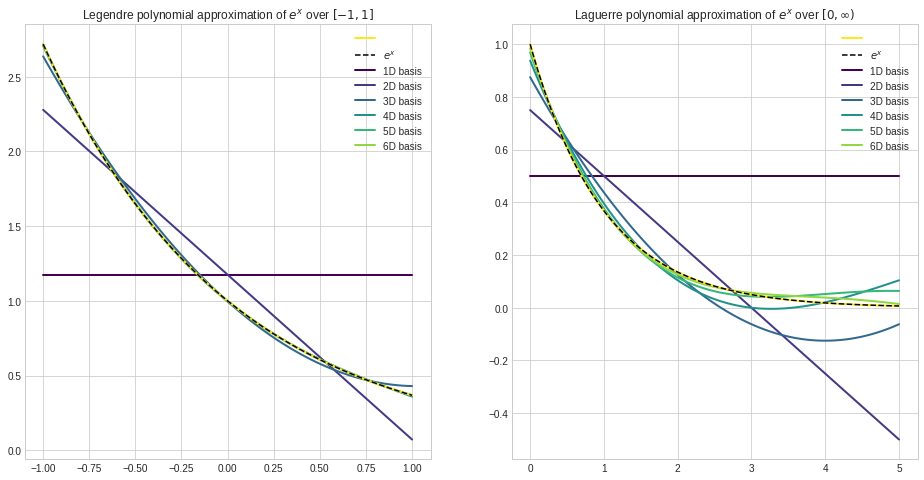

In [ ]:
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')
plt.style.use('seaborn-whitegrid')
# https://www.youtube.com/watch?v=xAoljeRJ3lU

fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

f = lambda x: np.exp(-x)

support = np.linspace(-1,1,100)
ax[0].plot(support, f(support), zorder=3, color=cmap(1.0), linewidth=2, label=' ')
ax[0].plot(support, f(support), 'k--', zorder=3, label='$e^x$')
ax[0].set_title('Legendre polynomial approximation of $e^{-x}$ over $[-1,1]$')

approximation = 0*support
K = 5
c_k = np.zeros(K+1) 
for k in range(K+1):
  c_k[k] = integrate.quad(lambda x: scipy.special.eval_legendre(k, x)\
                                    *((2*k+1)/2)*f(x), -1, 1)[0]
  approximation += c_k[k]*scipy.special.eval_legendre(k, support) # not efficient (per HW1.4)
  ax[0].plot(support, approximation, color=cmap(k/(K+1)), linewidth=2,
             label=str(k+1)+"D basis")

ax[0].legend()

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_laguerre.html#scipy.special.eval_laguerre
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.genlaguerre.html
# scipy.special.genlaguerre(3,alpha=0)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.laguerre.html#scipy.special.laguerre
# scipy.special.laguerre(3)

support = np.linspace(0, 5,100)
ax[1].plot(support, f(support), zorder=3, color=cmap(1.0), linewidth=2, label=' ')
ax[1].plot(support, f(support), 'k--', zorder=3, label='$e^x$')
ax[1].set_title('Laguerre polynomial approximation of $e^{-x}$ over $[0,\infty)$')

approximation = 0*support
K = 5
c_k = np.zeros(K+1) 
for k in range(K+1):
  c_k[k] = integrate.quad(lambda x: scipy.special.eval_laguerre(k, x)\
                                    *np.exp(-x)*f(x), 0, np.inf)[0]
  approximation += c_k[k]*scipy.special.eval_laguerre(k, support) 
  # not efficient (per Programming Portfolio Assignment 2 problem 3)
  ax[1].plot(support, approximation, color=cmap(k/(K+1)), linewidth=2,
             label=str(k+1)+"D basis")

ax[1].legend()

*This example is inspired by the **Expansion of Functions in Orthogonal Polynomials**, **An Example** sections on pages 175-176, and **Legendre Polynomials** and **Laguerre Polynomials** sections on pages 171 and 174 of Chapter 4.3 **Orthogonal Polynomials**  of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: on page 171 the normalization constant is seen to the reciprocal of $\frac{2k+1}{2}$, while $P_k(1) = 1$ for all $k$ has nothing to do the the normalization constant.]*

### [OMITTED] The Three-Term Recurrence Relation for Evaluating $f(x)$

---

***Horner's method*** and ***Minimal Newton Form*** define recursive factorizations of 

$$f_k(x) = \sum_{j=0}^kw_jx^j$$

from which $f_k(x)$ may be evaluated by repeated applications of multiplication by a first order function of $x$ followed addition of a scaler value. 

By recursively factoring $f_k$ one order of magnitude at a time, these methods make evaluating a polynomial computationally efficient.  E.g., ***Horner's method*** requires $k$ additions and $k$ multiplications, the minimal number required to evaluate a $k^{th}$ order polynomial $f_k(x)$.


\begin{align*}
  \\
  &  \large \text{Horner's Method} && \large  \text{Minimal Newton Form (for $x\in[a,b]$) }\\
  & \text{factor out a single $x$ at each step} && \text{$|\underset{x\in[a,b]}{g_j(x)}|>0$ has no roots, but $(|g_j(x)| - \underset{x\in[a,b]}{\min} |g_j(x)|)$ has roots $x_k = \underset{x\in[a,b]}{\text{argmin}} |g_j(x)|$}\\
  q_k = {} & q_k' + w_0 & g_{j}(x) = {} & \overbrace{(x-\xi_j)\underbrace{g_{j-1}(x)}_{>0, \; x \in [a,b]}}^{g_{j}(x)-d_j} + d_j, \quad d_j  = \underset{x \ \in [a,b]}{\text{sign}}(g_{j}(x))\underset{x \ \in [a,b]}{\min} |g_{j}(x)| = g_{j}(\xi_j) \\
\begin{array}{l}=\\\\=\end{array} {} & \begin{array}{l}x (q_{k-1}'+w_1) + w_0 \\\\ x (x(q_{k-2}'+w_2)+w_1) + w_0\end{array} &= {} & (x-\xi_j)\left(\overbrace{(x-\xi_{j-1})\underbrace{g_{j-2}(x)}_{>0, \; x \in [a,b]}}^{g_{j-1}(x)-d_{j-1}} + d_{j-1}\right) + d_j, \quad d_{j-1}  = \underset{x \ \in [a,b]}{\text{sign}}(g_{j-1}(x))\underset{x \ \in [a,b]}{\min} |g_{j-1}(x)| = g_{j-1}(\xi_{j-1}) \\ 
 \vdots \;\, {} &&  \vdots  \;\,  &\\
= {} & x (x( \cdots x(x(w_k) + w_{k-1}) \cdots +w_2)+w_1) + w_0 & = {} & (x-\xi_j) ((x-\xi_{j-1}) ( \cdots  ((x_1-\xi_1)(0+d_0) + d_{1}) \cdots  +d_{j-1}) + d_j \\\\
  \end{align*}
  
> I.e., ***minimal Newton form*** first factors the roots of $f_k(x)$ in the interval $[a,b]$ so
  $$f_k(x) = g_{k-R}(x)\prod_{i=1}^R(x-\xi_i), \quad |g_{k-R}(x)|>0 \text{ for } x \in [a,b]$$
  and then (recursively) reformulates $g_{j}(x)$ as $(g_{j}(x)-d_j)+d_j$ so that $(g_{j}(x)-d_j)$ is minimally vertically shifted (to \*just\* touch the $y=0$ axis in the interval $[a,b]$) allowing the new root $(x-d_j)$ to be factored from $(g_{j}(x)-d_j)$. 

Like ***Horner's method*** and ***minimal Newton form***, ***truncated orthogonal basis function representations*** 

$$f(x) \approx \overset{\text{very inefficient}}{\underset{\text{can be avoided}}{\sum_{k=0}^K c_k q_k(x)}} \; = \sum_{k=0}^K w_k x^k$$
  
can also be efficiently recursively evaluated

- without evaluating each orthogonal basis function $q_k$ (which is itself a $k^{th}$ order polynomial that can have $k+1$ non-zero terms)
- without knowing the $w_k$ coefficient for each $x^k$ term of the final polynomial approximation (in order to apply ***Horner's method***)

using the ***three-term recurrence relation***. Reducing each $q_k(x)$ down to first order polynomials using the ***three-term recurrence relation*** and then rearranging the terms produces the now familiar "multiplication-addition recursion" for polynomial function evaluation

> \begin{align*}
  {} & \mathscr{f}_{k+2} =  \mathscr{f}_{k+1} =  0  \\
  {} & \text{for ($j = k, k-1, ..., 1$)} \{ \\
  {} & \quad \mathscr{f}_{j} =  c_j + (r_{j+1} x + s_{j+1}) \mathscr{f}_{j+1}  - t_{j+2}\mathscr{f}_{j+2}  \\
  {} & \quad \text{if(verbose){print$(\mathscr{f}_{j})$}}\\
  {} & \}\\ 
  f(x) \approx  {} & \mathscr{f}_{0} = c_0q_0(x)  + q_1(x) \mathscr{f}_{1} - t_2 \mathscr{f}_{2}\\ {}\\
  \end{align*}
>
>  - where $r_j, s_j$, and $t_j$ are from the ***three-term recurrence relation*** $q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$
>    - e.g., for Chebyshev polynomials $r_k=2, s_k=0,$ and $t_k=1$ for $k\geq 2$
>  - $q_0$ and $q_1$ are the $0^{th}$ and $1^{st}$ order orthogonal polynomial basis function
>    - e.g., for the ***Chebyshev*** and ***Legendre*** (i.e., ***Jacobi***) and ***Chebyshev-Hermite polynomial bases*** $q_0(x) = 1$ and $q_1(x) = x$
>  - and this is the ***Clenshaw algorithm*** which is a result of the so-called ["reverse"](https://en.wikipedia.org/wiki/Clenshaw_algorithm#Clenshaw_algorithm) or ["downward"](https://mathworld.wolfram.com/ClenshawRecurrenceFormula.html) ***Clenshaw recurrence formula***
    - which is usually given in terms of an alternatively indexed parameterization of the ***three-term recurrence relation***
      $$q_{k+1}(x) = \alpha_k(x)q_{k}(x) + \beta_k(x)q_{k-2}(x)$$

  
*This problem is inspired by Algorithm 4.1 **Evaluation of a Truncated Expansion in Orthogaonal Polynomials at $x$** and the **Computations Involving Polynomials** and **Relations among the Members of an Orthogonal System** sections of Chapter 4.3 **Orthogonal Polynomials** on pages 168-170 of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: however, equation 4.41 (termed the "Nested Newton Form") is a unique **Newton Polynomial** whose "centers" cannot be changes without corresponding adjustments of the coefficients $\{c_k\}$ so the subsequent statement*

> *...for careful choices of the "centers" $a_i$, it has good numerical stability* 

*is confused because (despite appearing to) this doesn't actually refer to the "Nested Newton Form" but instead refers to the evaluation of a differently parameterized **Newton Polynomial** constructed using the **Minimal Newton Form** introduced above which automatically specifies 'careful choices of the "centers"' providing "good numerical stability" as detailed in the "Stable Evaluation of Polynomials" manuscript by Mesztenyi and Witzgall (1967) ([available here](https://scicomp.stackexchange.com/questions/13023/accurate-polynomial-evaluation-in-floating-point)); and $q$ is a misprint and should be $f$ in Algorithm 4.1 on page 170; and the subscripts for $r, t$, and $s$ are off by one relative to the previous notation given for the "three-term recursion formula" in equation 4.39 on page 168; and the `for` loop goes to $0$, but the formulas for $r_k,s_k,$ and $t_k$ only apply for $k \geq 2$ since they are based on first specifying $q_0(x)$ and $q_1(x)$.]*

<a name="cell-f-poly-eval"></a>
### [OMITTED] The Christoffel-Carboux Formula for Evaluating $f(x)f(y)$ ([Return to TOC](#cell-TOC-f)) 

---

$\require{cancel}$

1. For ***orthogonal*** polynomials $q_k$, i.e.,

$$\langle q_k, q_j \rangle = \int_D q_k(x) q_j(x) w(x) dx = 0$$

2. of increasing order $k$, there is an $r_k$ (not involving $x$) such that 

$$q_k(x) - r_k x q_{k-1}(x)$$

3. is a order $k-1$ polynomial, and so can be represented by the linear combination 

$$q_k(x) - r_k x q_{k-1}(x) = \sum_{k=0}^{k-1} a_k q_k(x)$$

4. But all that is needed is $j$ from $k-2$ to $k-1$, i.e.,

  $$q_k(x) - r_k x q_{k-1}(x) = \sum_{j=k-2}^{k-1} a_j q_j(x)$$

  because $q_{k'}$ is orthogonal to $q_{k-1}$ and $q_{k-2}$ for $k'<k-2$ since

  \begin{align*}
 \langle q_{k'}, \; q_k \! - \! r_k x q_{k-1} \rangle  = {} &  \cancel{\langle q_{k'}, \; q_k \rangle}^0 - \langle q_{k'}, \; r_k x q_{k-1} \rangle\\
 = {} & - \langle q_{k'}, \; r_k x q_{k-1} \rangle \quad (\text{can be nonzero for }k'=k-1)\\
 = {} & - \langle x q_{k'}, \; r_k  q_{k-1} \rangle \quad (\text{can be nonzero for }k'=k-2)\\
 = {} & 0 \quad\quad\quad\quad\quad\quad\;\;\;(\text{for }k'<k-2 \text{ as }  xq_{k-3} {\perp \!\!\!\perp} q_{k-1})
  \end{align*}

  but then for $q_{k'}$ with $0\leq k'<k$

  \begin{align*}
 \left\langle q_{k'}, \sum_{j=0}^{k-1} a_j q_j \right\rangle  = {} &  \langle q_{k'}, \; q_k \! - \! r_k x q_{k-1} \rangle \\
 \Longrightarrow \left\langle q_{k'}, \sum_{j=0}^{k-3} a_j q_j \right\rangle  = {} & 0 \quad \Longrightarrow \quad \text{$a_j=0$ for $j < k-2$}
  \end{align*}

  and for a fuller proof please see [Theorem 1 here](https://homepage.tudelft.nl/11r49/documents/wi4006/orthopoly.pdf).

5. Thus we have the so-called ***three-term recurrence relation***

$$q_k(x) = (r_k x + a_{k-1})q_{k-1}(x) + a_{k-2}q_{k-2}(x)$$

$$\text{or, converting the notation above into the more standard form}$$

$$q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$$

6. from which, [as seen here](https://homepage.tudelft.nl/11r49/documents/wi4006/orthopoly.pdf), we have ***Christoffel-Carboux formula*** for approximating the product of an arbitrary function at two points 

  $$f(x)f(y) \approx \sum_{k=0}^K c_k^2 q_k(x) q_k(y) = c_K^2 \frac{a_K}{a_{K+1}}\frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{x-y}$$

  since 

  \begin{align*}
 {} & q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x) \\
 = {} &\left[(r_{k+1} x + s_{k+1})q_{k}(x) - t_{k+1}q_{k-1}(x)\right]q_k(y)-\left[(r_{k+1} y + s_{k+1})q_{k}(y) - t_{k+1}q_{k-1}(y)\right]q_k(x)\\
 = {} & \left[r_{k+1} xq_{k}(x) - t_{k+1}q_{k-1}(x)\right]q_k(y)-\left[r_{k+1} yq_{k}(y) - t_{k+1}q_{k-1}(y)\right]q_k(x) \\
 = {} & r_{k+1}(x-y)q_{k}(x)q_{k}(y) + t_{k+1}(q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x)) \\
  \end{align*}

  so 

  \begin{align*}
  {} & \sum_{k=0}^K (x-y)c_k^2 q_{k}(x)q_{k}(y) \\
= {} & \sum_{k=0}^K c_k^2 \frac{(q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x)) - t_{k+1}(q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x))}{r_{k+1}} \\
= {} & \sum_{k=0}^K c_k^2 \left( \frac{q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x)}{r_{k+1}} - \frac{q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x)}{r_{k}}\right) = c_K^2 \frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{r_{K+1}} \\
  \end{align*}

  where $t_{k+1} = \frac{r_{k+1}}{r_{k}}$ because (assuming ***orthonormal*** $\{q_k\}$ for simplicity)

  \begin{align*} t_{k+1} = \langle q_{k-1},t_{k+1}q_{k-1}\rangle = {} & \langle q_{k-1}, r_{k+1} xq_{k} + s_{k+1}q_{k} - q_{k+1} \rangle \\
 = {}  & \langle q_{k-1},r_{k+1} xq_{k}\rangle + \langle q_{k-1},s_{k+1}q_{k}\rangle - \langle q_{k-1}, q_{k+1}\rangle \\
 = {} & \langle q_{k-1},r_{k+1} xq_{k}\rangle \\  
 = {} & \langle (r_{k} x)^{-1}q_{k},r_{k+1} xq_{k}\rangle = \frac{r_{k+1}}{r_{k}} \end{align*}

  because 
  - $q_{k-1} = (r_{k} x)^{-1}\underset{\quad \quad \text{so $\langle q_k,q_j\rangle$ cancels}}{\overset{\quad \quad q_k {\perp \!\!\! \perp} q_j\, j=0,\cdots,k-1 }{\left(q_{k} + {\cancel{\sum_{j=0}^{k-1} a_j q_j}}\right)}}$ 

  - because $r_{k}$ is the ratio of the coefficients of the highest order terms in $q_k$ and $q_{k-1}$ in order to satisfy 
  $$\mathbf{q_{k}(x) = r_{k} xq_{k-1}(x)} + s_{k}q_{k-1}(x) - t_{k}q_{k-2}(x)$$
  
  and 
  - $r_{k+1} = \frac{a_{k+1}}{a_k}$ where $a_k$ is the coefficient of the highest order term in $q_k$ for the same reason.
  
<!-- [Programming Portfolio Assignment 2 Problem 3](#cell-f)  --> 

> The next section will examine the efficient evaluation of 
>
> $$f(x) \approx \sum_{k=0}^K c_kq_k(x)$$
>
> for ***orthogonal polynomials*** $q_k$ which can be done without having to compute every $q_k(x)$ (which can involve $k$ terms) in the summation, just as the ***Christoffel-Carboux formula*** examined here
>
> $$f(x)f(y) \approx \sum_{k=0}^K c_k^2 q_k(x) q_k(y) = c_K^2 \frac{a_K}{a_{K+1}}\frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{x-y}$$
>
> avoids cacluating every term in the summation.
>
> - ~~Programming Portfolio Assignment 2 Problem 4] will examine the efficiency of other common statistical functions and other topics encountered in this course using code timing.~~

<a name="cell-f-poly-sob"></a>

### Details and Examples ([Return to TOC](#cell-TOC-f))

---

The ***three-term recurrence relations*** as well as weight functions and implied normalizing constants defining each of the ***standard orthogonal polynomial bases*** are given below. 
- The ***recursion formula*** identities are dependent on the interval of the domain, and the terms here are given in the traditional interval of each standard polynomial; but, these can be arbitrarily changed through scale-shift ***change of variables*** transformations. 
- ***Standard polynomial basis functions*** are not always ***normalized*** (i.e., ***orthonormal***); in fact, it's usually more important to scale them so they have a full set of distinct real roots or so the coefficient of the  largest degree ***monomial*** used in the trucation is $1$. 
  - The standard polynomial basis functions given here have a full set of real roots.
- The ***Legendre***, ***Chebyshev***, and ***Hermite*** polynomials of ***even*** and ***odd*** degree are, respectively
  - ***even functions*** so $f(x) = f(-x)$ and
  - ***odd functions*** so $f(x) = -f(-x)$. 

#### [OMITTED] Legendre Polynomials $P_k$
---

***Legendre polynomials*** are formed as the solution to ***Legendre's equation***

$$(1-x^2)u'' - 2xu' + k(k+1)u = 0$$

and ***discretized Legendre Polynomials***, useful as ***independent constrasts*** in linear model contexts, appear as the $Q$-matrix of a ***QR decomposition*** of the usual ***Vandermonde matrix*** 

$$\left[\begin{array}{cccc}1&x_1&x_1^2&\cdots\\1&x_2&x_2^2&\cdots\\\vdots&\vdots&\vdots& \ddots \\1&x_n&x_n^2&\cdots\end{array}\right]$$

constructed for a grid over $[-1,1]$.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} P_k(x)^2 dx = \frac{2}{2k+1} = P_k(1)^{1/2}$$|$$r_k=(2k-1)/k, \; s_k=0, \; t_k=(k-1)/k$$|

#### [OMITTED] Chebyshev Polynomials $T_k$

---

***Chebyshev polynomials*** have the simplest ***three-term recurrence relations***, so their evaluation is extremely simple relative to the other ***basis functions***.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} T_k(x)^2 (1-x^2)^{-1/2} dx \quad \text{(for the first kind)}$$| $$r_k=2, \; s_k=0, \; t_k=1$$|
|$$\displaystyle \int^1_{-1} T_k(x)^2 (1-x^2)^{1/2} dx \quad \text{(for the second kind)}$$|

#### [OMITTED] Jacobi Polynomials $Q_k$

---

***Jacobi polynomials*** are the general form from which ***Legendre*** and ***Chebyshev polynomials*** are derived, and use a beta distribution weight function.

|Normalizing constant||
|-|-|
|$$\displaystyle \int^1_{-1} Q_k(x)^2 (1-x)^\alpha(1+x)^\beta dx, \alpha,\beta > -1$$| $\alpha=\beta=0$ for ***Legendre polynomials***|
||$\alpha=\beta=\pm 1/2$ for ***Chebyshev polynomials***|

#### [OMITTED] Laguerre Polynomials $L_k^{(\alpha-1)}$

---

***Laguerre polynomials*** are defined for a domain that is bounded on only one side, and use a gamma distribution weight function whose parameter $\alpha$ controls the shape of the ***basis functions***.  

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} L_k(x)^2 x^{\alpha-1}e^{-x} dx$$|$$r_k=-\frac{1}{k}, \; s_k=\frac{2k-1}{k}, \; t_k=\frac{k-1}{k}$$|
|$\alpha=1$ is the most common choice|

#### [OMITTED] Chebyshev-Hermite Polynomials $H_k^e$

---

***Chebyshev-Hermite polynomials*** $H_k^e$ are a variant on the ***Hermite polynomials*** $H_k$ where the exponent in the weight function is divided by $2$ to make it a normal density rather than the ***error function*** $e^{-x^2}$.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
$$\displaystyle \int^1_{-1} H^e_k(x)^2 e^{-x^2/2} dx$$|$$r_k=1, \; s_k=0, \; t_k=k-1$$|

Treating the **Hermite polynomial** weight function $e^{-x^2}$ as part of the each polynomial ***basis function*** so

$$\left\langle H_k(x), H_{k'}(x) \right\rangle = \int H_k(x) H_{k'}(x)e^{-x^2} dx =\int \left(e^{-\frac{x^2}{2}} H_{k'}(x)\right) \left(e^{-\frac{x^2}{2}} H_{k'}(x)\right) dx$$
produces the so-called ***Hermite functions*** $e^{-\frac{x^2}{2}}H_k(x)$, which are ***exponentially tilted*** polynomials. These are another useful variant because the constant weight function is computationally convenient, and the tilting will improves the approximation in some circumstances. 

<a name="cell-f-examples-gram"></a>

#### [OMITTED] Density Approximation with Chebyshev-Hermite Polynomials ([Return to TOC](#cell-TOC-f))

---

Just as the $k^{th}$ derivative of the ***moment generating function*** $M(t)$ evaluted at $t=0$ gives the $k^{th}$ ***raw moment***

- $\displaystyle M(t) = 1+\sum_{k=1}^\infty \frac{E[X^k] t^k }{k!} \quad \Longrightarrow \quad \frac{d^k}{dt^k}M(t)|_{t=0} = E[X^k]$

so too does the $k^{th}$ derivative of the ***cumulant generating function*** $K(t) = \log M(t)$ evaluted at $t=0$ gives the $k^{th}$ ***cumulant***

- $\displaystyle K(t) = \sum_{k=1}^\infty \frac{\kappa_k t^k }{k!} \quad \Longrightarrow \quad \frac{d^k}{dt^k}K(t)|_{t=0} = \kappa_k$

> - $\kappa_1 = \frac{d}{dt}\log(M(t))|_{t=0} = \frac{M'(t)}{M(t)}|_{t=0} = \frac{E[X]}{1} = \mu$
> - $\kappa_2 = \frac{d^2}{dt^2}\log(M(t))|_{t=0} = \frac{d}{dt}M(t)^{-1}M'(t)|_{t=0} = M''(t)M(t)^{-1} - M(t)^{-2}M(t)'M(t)' = E[X^2] - E[X]^2 = \sigma^2$

And just as density functions $p_X(x)$ can be defined by their ***moment generating*** or ***characteristic functions***, they can also be defined in terms of their ***cumulant function*** as can be seen from the ***inversion formula*** (i.e., ***complex conjugate***) of the ***characteristic function $\varphi_{X}(k)$***

\begin{align*}
p_X(x) \propto {} & \int_{-\infty}^\infty e^{-itx} \varphi_{X}(t) dt
= \int_{-\infty}^\infty e^{-itx} M_{X}(it) dt\\
= {} & \int_{-\infty}^\infty e^{-itx} e^{K_{X}(it)} dt = \int_{-\infty}^\infty e^{-itx} \overbrace{\exp\left(\sum_{k=1}^\infty \frac{\kappa_k (it)^k }{k!}\right)}^{\varphi_{X}(t)} dt 
\end{align*}

Any other ***characteristic function*** $\psi_X(t)$ with density function $f_X$ and cumulants $\gamma_k$ matching $\varphi_{X}(t)$ (i.e., $\gamma_k = \kappa_k$) for $k \leq 2$ can thus be expressed as 

$$\psi_{X}(t) = \psi_X(t)\varphi_{X}(t)^{-1}\varphi_{X}(t) = \exp\left(\sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (it)^k }{k!}\right)\varphi_X(t)$$

so by substituting $p_X(x)$ for $\varphi_X(t)$, and $(-1)^{k} \frac{d^k}{dx^k}$ for $(it)^k$ because their ***duality*** in the the ***inversion formula***

\begin{align*}
(-1)^{k} \underset{\text{dual I}}{\boxed{\frac{d^k}{dx^k}}} \underset{\text{dual II}}{\boxed{p_X(x)}} \propto {} & (-1)^{k} \frac{d^k}{dx^k} \int_{-\infty}^\infty e^{-itx} \varphi_{X}(t) dt 
= \int_{-\infty}^\infty (-1)^{k} \frac{d^k}{dx^k} e^{-itx} \varphi_{X}(t) dt \\
= {} & \int_{-\infty}^\infty (-1)^{k} (-it)^k e^{-itx} \varphi_{X}(t) dt
= \int_{-\infty}^\infty e^{-itx} \overbrace{\underset{\text{of }(-1)^{k} p_X^{(k)}(x) }{\overset{\text{dual I}}{\boxed{(it)^k}} \overset{\text{dual II}}{\boxed{\varphi_{X}(t)}} }}^{\text{characteristic function}}_{\text{by inversion formula}} dt
\end{align*}

and using an expansion of $e^x$ in terms of [*Bell polynomials*](https://en.wikipedia.org/wiki/Bell_polynomials)

$$\underset{f_X(x)\, \Leftrightarrow \,\psi_{X}(t)}{\quad f_X(x) \, = } \; \underset{\text{$p_X(x) \,\Leftrightarrow\, \varphi_X(t)$ and $(-1)^{k}\! \frac{d^k}{dx^k}\, \Leftrightarrow \; (it)^k$}}{\exp\left(\sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (-1)^{k} \frac{d^k}{dx^k} }{k!}\right)p_X(x)}
 = \underset{\text{Bell polynomial expansion of } \exp(\cdots)}{\left(1 + \sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (-1)^{k} \frac{d^k}{dx^k} }{k!} + \cdots\right)}p_X(x)$$

Using normally distributed $p_X(x) = \phi_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$ means $\kappa_k = 0$ for $k>2$ and so

\begin{align*}
f_X(x) &= \underset{\phi(x)}{p_X(x)} + \frac{1}{\sqrt{2\pi \sigma^2}} \sum_{k=3}^\infty \frac{\gamma_k  }{k!}  (-1)^{k} \frac{d^k}{dx^k} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} \\
\end{align*}

which can be writen in terms of the ***generating function*** of the ***Chebyshev-Hermite polynomials***

$$H^e_{k}(z) = (-1)^{n}e^{\frac {z^{2}}{2}}{\frac {d^{k}}{dz^{k}}}e^{-{\frac {z^{2}}{2}}}$$

so 

\begin{align*}
f_X(x) = {} & \phi(x) + \frac{1}{\sqrt{2\pi \sigma^2}}\sum_{k=3}^\infty \frac{\gamma_k }{k!\sigma^k}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} H^e_{k}\left(\frac{x-\mu}{\sigma}\right) \\
= {} & \phi(x)\left( 1 + \sum_{k=3}^\infty \frac{\gamma_k }{k!\sigma^k}  H^e_{k}\left(\frac{x-\mu}{\sigma}\right) \right) 
\end{align*}


And ***truncated approximations*** from this specification are called ***Gram–Charlier series***.

> Two similar approximations are the [Edgeworth series](https://en.wikipedia.org/wiki/Edgeworth_series#The_Edgeworth_series) and [Cornish-Fisher expansion](https://en.wikipedia.org/wiki/Cornish%E2%80%93Fisher_expansion). These also use ***Chebyshev-Hermite polynomials*** in a similar form to that above; but, they are derived in different ways which leads to selections of different ***Chebyshev-Hermite polynomials***, and slighly different weightings for selected polynomials. 
> - Note that depending on the application and specific evaluations $f(x_0)$ that are required, it's not necessarily the case that ***Fourier coefficients*** for the selected ***Chebyshev-Hermite polynomials*** would be optimal.  ***Fourier coefficients*** are optimal in the minimal $L_2$-***norm*** sense, but this is a funtion of the entire function $f$ and not just specific evaluations $f(x_0)$.

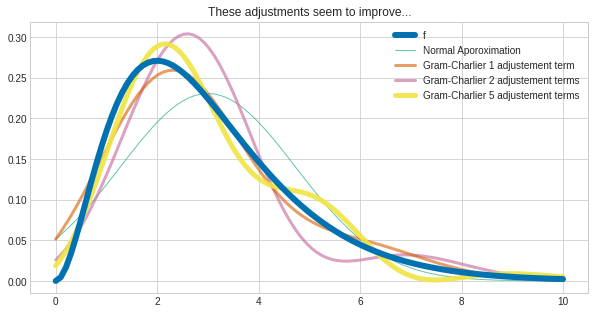

In [ ]:
# https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html
plt.figure(figsize=(10,5))
support = np.linspace(0,10,100)

# https://en.wikipedia.org/wiki/Gamma_distribution
k, theta = 3, 1
f = stats.gamma(a=k, scale=theta)
plt.plot(support, f.pdf(support), linewidth=6, zorder=5, label='f')

# NOT CORRECT (central and sample moments aren't cumulants):
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html
# cumulants = f.stats(moments='mvsk')
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstat.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html

# CORRECT (for theta=1):
# https://mathworld.wolfram.com/GammaDistribution.html
cumulants = [k * scipy.special.gamma(j) for j in range(1,10)] 


norm_approx = stats.norm(loc=cumulants[0], scale=cumulants[1]**0.5)
plt.plot(support, norm_approx.pdf(support), linewidth=1, zorder=1, alpha=0.6,
         label = 'Normal Aporoximation')

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_hermitenorm.html
# chebyshev_hermite = lambda k,x: np.polynomial.hermite_e.HermiteE(k)((x-cumulants[0])/cumulants[1]**0.5)
# https://numpy.org/doc/stable/reference/routines.polynomials.hermite_e.html
# https://numpy.org/doc/stable/reference/generated/numpy.polynomial.hermite_e.HermiteE.html#numpy.polynomial.hermite_e.HermiteE

adjustment_term = lambda k,x: (cumulants[k-1])/(scipy.special.gamma(k+1)*(cumulants[1]**0.5)**k)\
                              *scipy.special.eval_hermitenorm(k, (x-cumulants[0])/cumulants[1]**0.5)

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)),
         linewidth=3, zorder=4, alpha=0.6, label = 'Gram-Charlier 1 adjustement term')

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)\
                                             +adjustment_term(4,support)),
         linewidth=3, zorder=3, alpha=0.7, label = 'Gram-Charlier 2 adjustement terms')

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)\
                                             +adjustment_term(4,support)\
                                             +adjustment_term(5,support)\
                                             +adjustment_term(6,support)\
                                             +adjustment_term(7,support)),
         linewidth=5, zorder=4, alpha=0.9, label = 'Gram-Charlier 5 adjustement terms')

plt.title("These adjustments seem to improve...")
_ = plt.legend()

*This example is inspired by the **Expansion of Probabililty Density Functions** section of Chapter 4.2 **Basis Sets in Function Spaces** on page 165, **equations 4.32 and 4.33** on pages 165 and 166, and the discussion at the end of the **Hermite Polynomials** section in Chapter 4.3 **Orthogonal Polynomials** of pages 174-175 in James E. Gentle's **Computational Statistics** textbook. The presentation there relied upon wikipedia's [Edgeworth Series)](https://en.wikipedia.org/wiki/Edgeworth_series#The_Edgeworth_series) article, and Wallace's (1958) ["Asymptotic Approximations to Distributions"](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-29/issue-3/Asymptotic-Approximations-to-Distributions/10.1214/aoms/1177706528.full)
manuscript, especially the inversion formula duality given in equations 3.1 and 3.2.*

<a name="cell-sovling-datasmoothing"></a>
# 5.3 Data Smoothing / Prediction ([Return to TOC](#cell-TOC-f))

---

As considered in [Week 5 Programming Assignment Problem 1](#cell-f), ***interpolation*** creates a function which goes through every data point in a data set. ***Interpolation*** between observed data points is distict from the notion of ***extrapolation*** beyond the region of observed data points.  And both of these concepts are of course distinct from ***approximation*** as in

$$\sum_{k=0}^K \langle f, b_k \rangle b_k \approx \sum_{k=0}^\infty \langle f, b_k \rangle b_k \quad \text{ or } \quad X_{n\times m} \approx U_{n\times d}D_{d\times d}[V^T]_{d\times m} \quad \text{ or } \quad X \hat \beta \approx y$$

In the latter example $\hat \beta$ is the solution of a system of linear equations which can be found by ***direct methods*** or increasingly accurately ***approximated*** by ***iterative methods*** that reformulate the problem as the solution to an optimization problem.

Now, by interpreting $X \hat \beta \approx y$ as $X \hat \beta = \hat y \approx E[y|X]$ the ***approximation*** problem becomes an ***estimation*** problem that is dependent on the observed $X$ and $y$ data. That is, the ***estimation*** of $E[y|X]$ can be improved on the basis of increased data.

The process of ***approximating*** $g(x)=E[y|x]$ as a model $f(x)$ from some class of models $\mathcal F$ and then ***estimating*** $\hat f(x)$ 

- for example as $\tilde X \hat \beta \in \mathcal F = \{ X\beta \}$ the class of ***linear models*** (where the $\tilde X$ notation indicates consideration of different design matrices)

combines ***approximation*** and ***estimation*** together in the (additionally distinct) task of ***data smoothing / prediction***:

$$\underbrace{\overset{\textbf{approximated}\text{ with model class }}{E[y|x] = g(x) \approx \underset{\in \mathcal F}{f(x)}} \quad \underset{\text{based on observed data}}{\textbf{estimated}\quad\quad\;} \quad \text{ as} \quad \hat f(x)}_{\Large \textbf{data smoothing / prediction}}$$

> It is of course ideal when $E[y|x] = g(x) \in \mathcal F$ so 
$$\displaystyle \lim_{n \rightarrow \infty} \hat f_n(x) \rightarrow E[y|x] = g(x) $$
but any family of functional forms $\mathcal F$ which is simple and parsimonious and yet still capable of representating the important ***generalizable*** characteristics of the data such as
$$y=\beta_0+\beta_1x \approx E[y|x]$$
is performing ***data smoothing / prediction***. 

<a name="cell-sovling-datasmoothing-lm"></a>
## 5.3.0 Linear Model Regression ([Return to TOC](#cell-TOC-f))

---

A linear model regresison fit $\displaystyle \hat y = \hat f(x) = \sum_k \hat \beta_k x_k$ for 

$$y = \underbrace{E[y|x]}_{g(x)} + \epsilon \approx \underbrace{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)}_{f(x)} + \epsilon$$

can be seen as a ***data smoothing / prediction*** process based on

1. ***approximating*** $g(x) = E[y|x]$ with $f^{best}(x) \approx g(x)$ with the $\{x_k: k=0,\cdots,d\}$ ***basis***

2. ***estimating*** $\{\hat \beta_k: k=0,\cdots,d\}$ which specifies $\hat f(x) \approx f^{best}(x)$ based on the observed $X$ and $y$ data

The accuracy of $\hat f(x) \approx E[y|x]$ then depends on 

1. the ***basis*** $\{x_k: k=0,\cdots,d\}$ which determines the accuracy of the $f^{best}(x) \approx g(x)$ ***approximation***, which is essentially theoretically unconstrained; and,
2. the observed data $X$ and $y$ which determines the accuracy of the $\hat f(x) \approx f^{best}(x)$ ***estimation***, which may be constrained by the practical limitations of collecting data

By increasing the representational capability of the $\{x_k: k=0,\cdots,d\}$ ***basis***, the $f^{best}(x) \approx g(x)$ ***approximation*** improves; however, there is a ***curse of dimensionality*** in that the larger the dimension $d$ of the ***basis***, the worse the $\hat f(x) \approx f^{best}(x)$ ***estimation*** will be. This can be understood as simply due to the fact that higher dimensional spaces is larger, and so the point $\{\hat \beta_k: k=0,\cdots,d\}$ defining $\hat f(x)$ will tend to be further and further away from the point $\{\beta_k: k=0,\cdots,d\}$ defining $f^{best}(x)$ as $d$ increases.  Practically this means that theoretical gains in accuracy of $f^{best}(x) \approx g(x)$ can be lost by corresponding reduced accuracy in $\hat f(x) \approx f^{best}(x)$. Thus, practical limitations on the choice of the $\{x_k: k=0,\cdots,d\}$ ***basis*** follow from limitations in $X$ and $y$ data.

> ***Generalizability*** refers to how effective the $\hat f(x) \approx f^{best}(x) \approx g(x)$ ***estimation*** and ***approximation*** is; and, the above considerations suggests that this will tend to dependend upon the degree of the polynomial and choice of $X$.

<a name="cell-f-examples-spline"></a>

## 5.3.1 Spline Basis Functions ([Return to TOC](#cell-TOC-f))

---

The ***truncated power functions*** (along with some leading ***monomials***) form a ***basis*** of functions that are 

- ***smooth*** $p-1$ times [***continuously differentiable***](https://en.wikipedia.org/wiki/Smoothness)
- ***piecewise polynomials*** of order $p$ 

that for a sufficient number of well-chosen ***knots*** $k$ can provide good approximations for many functions

\begin{align*}
  f(x) \approx \hat f(x) = {}& \sum_{j=0}^{p+k} \beta_j b_j(x)\\
  \{b_j(x): j=0, \cdots, p+k\} = {}& \{1, x, x^2, \cdots , x^p, (x-z_1)^p_+, \cdots , (x-z_k)^p_+\}\\
\text{where } y^p_+ = {}& \left \{ \begin{array}{rl}y^p&y> 0 \\0 & y \leq 0\end{array} \right .
  \end{align*}

For example, ***cubic-splines*** with $p=3$ and reasonable ***knots*** are smooth but do not oscilate (like high order polynomials); and, if the second derivative is set to $0$ outside the ***knots*** so the function is linear outside the knots, then the resulting function generally appears "natural" to the human eye (and thus this latter formulation are called ***natural cubic-splines***). 

> ***Truncated power functions*** are usually dismissed in favor of ***B-splines*** because ***B-spline basis functions*** provide the same smoothness and piecewise polynomial behavior but are also
  - more numerically stable than polynomial power calculations
  - protective against ***multicollinearity*** since
    - with ***truncated power functions*** the powers of $x$ can be correlated 
    - the final $k$ ***truncated power functions*** are equal to each other for $x$ less than their corresponding $x<z_i$ truncation   
    - whereas ***B-spline basis functions*** are "locally nonzero" and thus produce more "balanced", less correlated vector instantiations
>
> all of which lead to a better distribution of ***singular values*** and lower ***condition numbers*** in the ***design matrices*** $X$ produced by ***B-spline basis functions*** as opposed to ***truncated power functions***.

In [68]:
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, knots=[.25,.5,.75], degree=3, include_intercept=True) - 1", {"x": x})
Xs = np.asarray(build_design_matrices([y.design_info],  {"x": x})[0])

b = np.array([1,1,1,-1,1,2,1])

plt.figure(figsize=(15,7.5))
plt.plot(x, Xs); plt.plot(x,np.dot(Xs,b),'k--')
print(b)

In [68]:
plt.figure(figsize=(15,7.5))
b = np.array([1,1,-1,-1,1,-1,1])
plt.plot(x, X); plt.plot(x,np.dot(X,b),'k--')

In [68]:
# compare against a truncated power function basis
x = np.linspace(0., 1., 100)
X = np.c_[1+0*x,x,x**2,(x>.2)*(x-.2)**2,(x>.4)*(x-.4)**2,(x>.6)*(x-.6)**2,(x>.8)*(x-.8)**2]

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(np.abs(np.corrcoef(X.T)),vmax=1,vmin=0)
ax[0].set_title("Truncated Power Function Basis")
ax[1].imshow(np.abs(np.corrcoef(Xs.T)),vmax=1,vmin=0)
_=ax[1].set_title("B-Splines")

In [44]:
print(np.round(np.corrcoef(X.T),2))
np.round(np.corrcoef(Xs.T),2)

In [44]:
np.linalg.cond(X), np.linalg.cond(Xs)

In [70]:
# https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
# boston = load_boston()
# y = boston.target
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
y = housing.target
x = range(0, len(y))
# https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab13-py.html
bsv1 = dmatrix("bs(train, df=10, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit1 = sm.GLM(y, bsv1).fit()
bsv2 = dmatrix("bs(train, df=50, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit2 = sm.GLM(y, bsv2).fit()

plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c="g", alpha=0.5)
plt.plot(x,fit1.predict(bsv1), linewidth=8)
plt.plot(x,fit2.predict(bsv2), c='k', linewidth=4)

*This example is inspired by Chapter 4.4 **Splines** on pages 178-180 (and Figure 4.5 on page 181) and the **Smoothing Data with Orthogonal Polynomials** section of Chapter 4.3 **Orthogonal Polynomials** on pages 170-176 of James E. Gentle's **Computational Statistics** textbook.*

<a name="cell-sovling-smoothing"></a>
## 5.3.2 Smoothing Matrices ([Return to TOC](#cell-TOC-f))

---

- This section is adapted from the presentation in Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document.

Linear model regression creates $X\hat \beta \approx y$ where the exactness of the approximation is determined by the familar ***hat matrix***

$$\hat y = \underbrace{X(X^TX)^{-}X^T}_{H_{n \times n}}y$$

which is itself determined by the choice of ***basis functions*** of the ***design matrix*** $X$, e.g., 

$$X\beta = \underset{\text{traditional modeling}}{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)} \quad \text{ or } \quad \underset{\text{B-spline modeling}}{X\beta = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j)}$$

Alternatively however, the ***projection matrix*** $H$ may be replaced with ***smoothing matrix*** $S$ parameterized by ***positive definite*** $A$ and ***penalty parameter*** $\lambda$ such that

$$\hat y = \underbrace{(I + \lambda A)^{-1}}_{S_{n \times n}} y \quad y^T A y \geq 0, \lambda \geq 0 $$

which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ which solves the ***penalized least squares*** problem

$$\nabla_{\hat y} \left(\underset{\text{$\hat y_i$ with close $x_i$ should be close}}{\overset{\text{Penalized Least Squares: $A$ means}}{(y-\hat y)^T(y-\hat y) + \lambda \hat y^T \!\!A \hat y}} \right) = -2y + 2\hat y + 2 \lambda A \hat y = 0$$

The ***smoothing matrix*** $S$ will be ***idempotent*** (so $SS=S$) if $A \hat y = 0$ since by the [***Sherman-Morrison-Woodbury***](#cell-sovling-SMWoodbury) formula

$$SS y  =  S \hat y = (\underset{\,\large A + UCV}{I + 1 \lambda A})^{−1} \hat y = \left[ I − (\lambda^{-1} + A)^{−1} A \right] \hat y \overset{A \hat y= 0}{=} \hat y = S y $$

If ***smoothing matrix*** $S$ is ***idempotent*** then the ***eigenvalues*** $\lambda_i$ of $S$ will be either $0$ or $1$, although generally they will satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$; and, regardless, the ***model complexity*** of a ***smoothing matrix*** can be measured as $\text{tr}(S) = \sum \lambda_i$.


> [***LOESS***](https://en.wikipedia.org/wiki/Local_regression) and [***LOWESS***](https://en.wikipedia.org/wiki/Local_regression) implicitly induce a ***smoothing matrix*** $S$, as do [***cubic smoothing splines***](https://en.wikipedia.org/wiki/Smoothing_spline#Cubic_spline_definition)
> $$\underset{\text{optimal natural cubic spline $f_\lambda^*$ depends on the penalty parameter $\lambda > 0$}}{{f}_\lambda^{*} = \underset{ f}{\text{argmin}} \sum _{i=1}^{n}\{y_{i}-{ {f}}(x_{i})\}^{2}+\lambda \int { {f}}''(x)^{2}\,dx}$$
> 
> which are so called because it is a specific [***natural cubic spline***](https://en.wikipedia.org/wiki/Spline_(mathematics)#Algorithm_for_computing_natural_cubic_splines) ${f}_\lambda^{*}$ which is the [optimal solution](https://en.wikipedia.org/wiki/Smoothing_spline#Derivation_of_the_cubic_smoothing_spline) 
> depending on the given choice of penalty parameter $\lambda$.
>
> - Even though the optimal function ${f}_\lambda^{*}$ for ***cubic smoothing spline*** methodology is a ***natural cubic spline***, this ***smoothing matrix methodology*** is not a ***spline basis function methodology***. ***Spline basis functions*** specify a ***design matrix*** $X$ for a ***least squares*** problem, while  ***smoothing matrices*** induce an optimal solution to a ***penalized least squares*** problem. 
>   - I.e., the ***natural cubic spline*** fit ${f}_\lambda^{*}$ for ***cubic smoothing splines*** is obtained as the solution to a ***penalized least squares*** "smoothing" problem for ***smoothing matrix*** $S$ and not based on some ***hat matrix*** $H = X(X^TX)^{-1}X^T$ for some ***design matrix*** $X$ constructed from ***spline basis functions***.  
>   - E.g., the choice of the ***knots*** is very different for ***natural cubic splines*** used to create a ***design matrix*** $X$ and the knots chosen for computing a ***cubic smoothing spline*** fit ${f}_\lambda^{*}$.

<!--
> The ***eigenvalues*** $\lambda_i$ of ***smoothing matrices*** satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$; and, are only either $0$ or $1$ when $S$ is an ***idempotnent matrix***. 
>
> In the latter case, if $ S y = \hat y = \hat \beta_0 + \hat \beta_1 x$, then 
>
> $$S(\beta_0 + \beta_1 x) = \underset{=1 \times (\beta_0 + \beta_1 x) }{\beta_0 + \beta_1 x}$$
> has an ***eigenvalues*** of $1$.  Continuing, if $X\beta = \beta_0 + \sum_{j=1}^k \beta_j x_j$ and
>
> $$\underbrace{S(\beta_0 + \beta_k x_k) }_{x_{j\not = k} \,= \,0} = \beta_0 + \beta_k x_k$$
>
> then each coefficient parameter corresonds to a single ***eigenvector*** with ***eigenvalue*** of $1$ and the number of coefficient parameter $\text{tr}(S) = k$; and, more generally, $\text{tr}(S)$ measures the ***model complexity*** of ***smoothing matrix*** $S$.
-->

In [71]:
lowess = sm.nonparametric.lowess
z = lowess(y, x, frac=3/100)
plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(*z.T, c='k', linewidth=4)

<a name="cell-sovling-backfitting"></a>
## 5.3.3 Backfitting Additive Regression Models ([Return to TOC](#cell-TOC-f))
---

- This section is adapted from the presentation in Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document.

***Splines*** specify predefined ***basis functions*** over the data axes $x_j$ so that

$$\hat y = \sum_{j=0}^J f_j(x_{j}) = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j) = X\beta $$

However, the functions $f_j$ themselves (rather than the $\beta_{jk}$ ***coefficients***) could be considered unknown and estimated through

$$\min_{f_j} ||y - \sum_{j=0}^k f_j(x_{j})||_2 \quad\text{ where }\quad f_0(x_{0}) = \beta_0 \text{ and } \sum_i f_j(x_{ij}) = 0 \text{ for } j>0 $$

> E.g., letting $f_j$ be ***smoothing matrices*** $f_j(x_j) = S_jy = S_{x_j}y$ where
> 
> $$S_0 = \frac{1}{n}\left[\begin{array}{ccc}1 & \cdots & 1 \\ \vdots & \ddots & \vdots\\1 & \cdots & 1\end{array}\right] \quad \text{and} \quad \sum_i (S_jx_j)_i = 0 \text{ for } j>0$$
> 
> the quadratic function 
$$\min_{S_{x_j}} ||y - \sum_{j=0}^k S_{x_j} y||_2$$
> 
> can be optimized in the style of ***Gauss-Seidel*** using ***backfitting*** by iteratively updating 
> 
> $$\hat f_j(x_{j}) = S_{x_j} \left(y - \sum_{k \not = j} S_{x_k} y \right) \quad \text{and} \quad \hat \beta_0 = S_0 \left(y - \sum_{j>0} S_{x_j} y \right)$$

> ***Spline*** specifications for $f_j$ could also be used and estimated on the basis of ***backfitting*** from the residuals as is done with ***smoothing matrices*** above; however, once ***smoothing matrices*** $S_j=S_{x_j}$ have been specified no model fitting is required since $\hat f_j(x_{j}) = S_{x_j} (y-\hat y_{-j})$ is just a matrix-vector multiplication. 

While ***backfitting*** is similar in spirit to ***Gauss-Seidel*** in its use of cyclic sequential updates, it does not have analytical convergence conditions; however, in practice it typically stabilizes after
several iterations, which suggests convergence of the algorithm.

> - For examples of ***backfitting***, please see Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document. which demonstrate
>
>   - estimating 
>
>     $$\hat f(x_i) \approx y_i = \sin(2\pi x_{i1}) + 10x_{i2}^2 + \epsilon_i$$
>
>     using [***LOESS***](https://en.wikipedia.org/wiki/Local_regression) (locally estimated scatterplot smoothing) locally weighted quadratic least squares regression in the role of $S_k$  
> 
>   - estimating maximal correlation for a bivariate random variable $(X, Y)$ from $n$ obseved samples $(x,y)_{1:n}$ using the ***ACE*** (alternating conditional expectation) algorithm which (until stabilization) repeatedly iterates 
>     - $x^* = \widehat y^* = E(y^*|x) \leftarrow \widehat\psi(x)$
>     - $y^* = \widehat x^* = E(x^*|y) \leftarrow \widehat \phi (y)$
>    
>     and then evaluates $\text{cor}(x^{*}, y^{*})$ 
>     - which is maximal since $x^{*}$ and $y^{*}$ are transformations $\psi(x)$ and $\phi (y)$ which are constructed to be as similar to each other as possible.


In [71]:
n = 1500
np.random.seed(410)
x = np.random.uniform(low=0, high=30, size=(n,3))
epsilons = np.random.normal(size=n)

# construct f_k
f_1 = lambda z : 2 * np.cos(2 * z)
f_2 = lambda z : np.log(z)
f_3 = lambda z : 0.025 * ((z - 15)**2) - 3

x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]
# construct y
y = f_1(x1) + f_2(x2) + f_3(x3) + epsilons

fig, ax = plt.subplots()
ax.plot(x[:,0], 2*np.cos(2*x[:,0]), '.')
ax.plot(x[:,1], np.log((x[:,1])), '.')
ax.plot(x[:,2], .025*(x[:,2]-15)**2-3, '.')

In [71]:
# predefined smoothing matrix/function
lowess_fx_k = [0,
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.03, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.2, return_sorted=False),
               lambda y,x: sm.nonparametric.lowess(y,x, frac=0.3, return_sorted=False)]

# initialized functions not yet satisfying sum_i fx_k = 0 for k>0
fx_k = [0*y]*4

# recover additive nonlinear functions
fig, ax = plt.subplots(2,3, figsize=(15,10))
for j in range(6):
    for k in range(len(fx_k)):
        if k==0:
            fx_k[0] = 0*y + (y - sum(fx_k[1:])).mean()
        else:
            epsilons = y - (sum(fx_k) - fx_k[k])
            fx_k[k] = lowess_fx_k[k](epsilons, x[:,k-1])
            fx_k[k] = fx_k[k] - fx_k[k].mean()

        xy = pd.DataFrame({'x':x[:,k-1],'y':fx_k[k]}).sort_values(by='x')
        ax.ravel()[j].plot(xy['x'],xy['y'])
        ax.ravel()[j].set_title("Iteration "+str(j+1))

ax.ravel()[j].plot(x[:,0], 2*np.cos(2*x[:,0]) - np.mean(2*np.cos(2*x[:,0])), '.')
ax.ravel()[j].plot(x[:,1], np.log((x[:,1]))-np.mean(np.log((x[:,1]))), '.')
ax.ravel()[j].plot(x[:,2], .025*(x[:,2]-15)**2-3 - np.mean(.025*(x[:,2]-15)**2-3), '.')        

<a name="cell-sovling-regularization"></a>
## 5.3.4 Regularization ([Return to TOC](#cell-TOC-f))

---

The introduction of the ***penalized least squares*** form of ***smoothing matrices***

$$\min_{S|\lambda, A}||y-Sy||_2^2 + \lambda \left(||Sy||^A_2\right)^2 = \min_{\hat y} (y-\hat y)^T(y-\hat y) + \lambda \hat y^T A\hat y$$

suggests other ***penalized*** forms of the linear regression problem, such as

$$\min_{\beta|\lambda}||y-X\beta||_2^2 + \lambda ||\beta||_p^p$$

which takes the two canonical forms

$$\underset{\text{Lasso Regression $L_1$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \sum_k |\beta_k|}}\quad\quad \underset{\text{Ridge Regression $L_2^2$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \beta^T\beta}} 
$$

The solution to the $L_2^2$ penalty form is also known as ***Tikhonov regularization*** and has the solution

$${\displaystyle {\hat {\beta }}=( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )^{-1} {X} ^{\mathsf {T}} \!{y} }$$

Adding to the diagonal of the ***grammian*** in $( {X} ^{\mathsf {T}} \!{X} +\lambda  {I} )$ can greatly benefit the ***condition number*** of the problem. And indeed, [this is exactly](https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why) the kind of solution that is required for an ***ill-conditioned*** design matrix $X$ since no matter how accurate ***QR*** and ***SVD*** can be for solving the ***normal equations***, they will still not be able to adequately address volatility due to ***roundoff error*** in the context of ***ill-conditioning***. 

> The figure below shows the coordinates of the function space for ***simple linear regression***. The intersection of the highest point of the (red contour) likelihood with the (green) restricted "acceptible region" induced by the choice of the $\lambda$ penalty parameter and the $L_p$ regularization will be the $\hat \beta_\lambda$ which optimizes the penalized likelihoods.
>
> ***Regularization*** such as this is generally intended to promote ***generalizability*** of fitted models.  Returning to the notion of ***data smoothing / prediction***, the reason this promotes ***generalizability*** is that even if the "acceptible region" excludes the $f_{\beta}(x) = f^{best}(x) \approx g(x)=E[y|x]$  ***approximation***, the $\hat f(x) = f_{\hat \beta_\lambda}(x) \approx f_{\beta}(x)$ estimation can be improved by restricting $f_{\hat \beta_\lambda}(x)$ to be within the "acceptible region" of the function space. 
>
> This is done by examining so-called ***out of sample*** performance many different choices of the $\lambda$ penalty (tuning) parameter. This effectively allows computation and consideration of many different $
\beta_\lambda$ and the one with the best ***out of sample*** performance can be assumed to have the best accuracy for $f_{\hat \beta_\lambda}(x) \approx E[y|x]$
>
> |![](https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png)|
|:-:|
|The classic image illustrating $L_1$ and $L_2$ regularization from [Introduction to Statistical Learning](https://www.quora.com/When-is-it-better-to-use-Ridge-regression-over-LASSO-regression-and-vice-versa) textbook|


<a name="cell-sovling-shrinkage"></a>
### [OMITTED] Shrinkage and Bayesian Prior Regularization ([Return to TOC](#cell-TOC-f))

---


The mechanism of ***ridge*** and ***lasso*** penalties serves to ***shrink*** coefficient estimates towards $0$ by penalizing large coefficient values, this form of ***regularization*** is called  ***shrinkage estimation***. The effect of ***shrinkage regularization*** is to limit the area of the ***function space*** from which $\hat \beta \equiv \hat f$ may be chosen.
For $L_2$ and $L_1$ ***regularization*** this has the respective effect of restricting $\hat \beta$ to be chosen from within "circles" and "45-degree rotated squares" around the origin.

|![](https://wires.onlinelibrary.wiley.com/cms/asset/5c9f3e6c-7808-44ec-81d4-af163d51a5df/wics1463-toc-0001-m.jpg)|<img src="https://miro.medium.com/max/1184/1*IUshR9FUv8fW_e-L9CgrPg.png">|
|:-:|:-:|
|[Bayesian regularization: From Tikhonov to horseshoe](https://onlinelibrary.wiley.com/doi/abs/10.1002/wics.1463) and see [this stack exchange post](https://stats.stackexchange.com/questions/350046/the-graphical-intuiton-of-the-lasso-in-case-p-2) for further clarification|[Handling Sparsity via the Horseshoe](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf)|


Interestingly, the solution to the ***ridge*** and ***lasso regression*** optimization problems is the ***maximum a posteriori*** (MAP) estimate for specific choices of ***Bayesian priors***, i.e.,

> \begin{align*}
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
(2\sigma_0)^{-p/2} 
e^{-\frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2 + \\
 & {} 
\log \left((2\sigma_0)^{-p/2}\right) - \frac{(\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\intercal(\boldsymbol{\beta}-\boldsymbol{\beta}_0)}{2\sigma_0^p}\\\\
\log \left(\left( \prod_{i=1}^n \frac{1}{\sqrt{2\sigma}}e^{-\frac{}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right)^2} \right) 
\prod_{k=1}^p
\frac{1}{2b_{k0}} 
e^{-\frac{|\beta_k-\beta_{k0}|}{b_{k0}}}
\right) {} = & 
\sum_{i=1}^n  \log \frac{1}{\sqrt{2\sigma}} - \sum_{i=1}^n \frac{1}{2}\left(\frac{y_i-\mathbf{x}_i^\intercal \boldsymbol{\beta}}{\large \sigma}\right) + \\
 & {} 
\sum_{k=1}^{p} \log \frac{1}{2b_{k0}} - 
\sum_{k=1}^{p} \frac{|\beta_k-\beta_{k0}|}{b_{k0}} 
\end{align*}

With this view however, it is thus clear that ***Bayesian analysis*** naturally provides ***regularization*** through the ***prior*** specification, and different forms of ***shrinkage regularization*** can be induced by specifying different ***priors***.  E.g., 
- ***Gaussian*** and ***Laplace priors*** correspond to $L_2$ and $L_1$ shrinkage
- a ***Cauchy prior*** has the effect of combining the $L_2$ and $L_1$ constraints into a "rounded square diamond" shape
- and the ***horseshoe prior*** can both ***shrink*** and ***inflate*** coefficient estimates. 

<a name="cell-sovling-underoverfitting"></a>
### [OMITTED] Generalizability, Model Complexity, and Underfitting and Overfitting ([Return to TOC](#cell-TOC-f))

---

If model predictions do not ***generalize*** well to future predictions so that $\hat f(x) \not \approx E[y|x]$ then $f$ is said to to be either ***overfit*** or ***underfit***. 
- ***Overfit*** models tend to not ***generalize*** well because they are not consistent from data set to data set; i.e., such models are much more likely to relect the idiosyncrasies of a data set rather than the actual trends in the population of interest.
 > The ***saturated model*** $\hat y = y$, e.g., $X\hat \beta=y$ is maximally ***overfit***.

- ***Underfit*** models do not ***generalize*** well because they are not sufficiently rich to capture relevant variation in the data; however, ***underfit*** models are "reliable" in the sense that their fits tend to be consistently from one data set to the next.
 > The ***null model*** $\hat y = \hat \beta_0$ is maximally ***underfit***.

By controlling accuracy of the approximation, e.g., by
 
- restricting the model class $\mathcal F$ under consideration
- altering the form of the ***design matrix*** in $X\hat \beta \approx y$ 
- adjusting the ***smoothing*** by changing $S$ in $\hat y = Sy$
- tuning a ***reguarlization*** parameter $\lambda$ penalizing, e.g.,
  - $||\beta||$ for linear model regresion contexts
  - $||\hat y ||^A$ for ***smoothing matrix*** contexts

the placement of a model fit on the spectrum between ***overfitting*** and ***underfitting*** can be tuned to optimize for the best ***generalizability*** possible. I.e., flexible enough to capture consistently observable trends in the data, but not so flexible that model fits deviate unstably from one data set to the next.

> Generally, the more flexible a model is the more risk it has to be ***overfit***, while the less flexible a model is the more risk it has to be ***underfit***. 
- So, e.g., larger $\text{rank}(X)$ or $\text{tr}(S)$, can lead to ***overfitting*** while smaller values for these model complexity measures can lead to ***underfitting***. 
- And, e.g., restricting the region of space from which models may be chosen by using a $\lambda$ penalty to ***regularize*** a model fit can reduce the flexibility of the model class under consideration thereby reducing ***overfitting***, even when $\text{rank}(X)$ is large 
  - and the ***effective model complexity*** $\text{tr}(S=(I + \lambda A)^{-1})$ of ***smoothing matrix*** $S$ is automatically inversely proportional to penalty parameter $\lambda$.

<a name="cell-sovling-bias-variance"></a>
### [OMITTED] Generalizability, Model Complexity, and the Bias-Variance Tradeoff ([Return to TOC](#cell-TOC-f))

---

Model ***underfitting*** and ***overfitting*** can be characterized in terms of the celebrated ***bias-variance tradeoff*** derived from the ***generalizability*** measure

$\require{cancel}$

$$\begin{align*}
E\left[\left(y-\hat y\right)^2\right] & {} = E\left[\left(y-E[y] + E[y] - E[\hat y] + E[\hat y] - \hat y \right)^2\right]\\
& {} = E\left[\left(y-E[y]\right)^2\right] + \left(E[ y]-E[\hat y]\right)^2 + E\left[\left(E[\hat y] -\hat y\right)^2\right] + \cancel{E[(y-E[y])(\hat y - E[\hat y])]}^{0?}\\
& {} = \underset{\text{uncertainty}}{\underset{\text{intrinsic/aleatoric}}{{\text{Var}\big[\, y\, \big] \;\, +}}}  \underset{\LARGE \text{underfitting}}{\overbrace{{\underset{\text{model misspecification}}{\underset{\text{squared bias}}{\left(E[ y]-E[\hat y]\right)^2}}}}^{\Large \text{bias} }} \overset{\Large -}{\overset{\Large \vphantom{1pt}}{+}} \underset{\LARGE \text{overfitting}}{\overbrace{{\underset{\text{uncertainty}}{\underset{\text{estimation/epistemic}}{\text{Var}\left[E[\hat y]\right]^{\vphantom{2pt}}}}}}^{\Large \text{variance}}} \overset{\Large \text{tradeoff}}{\Huge \phantom{1pt}}
\end{align*}$$

which implies that 

- ***Underfitting*** can be corrected by increasing model flexibility so $E[\hat y] \approx E[y]$ and the ***model bias*** is decreased; however, this may also cause ***overfitting*** since a more flexibility model may require estimating more parameters (with the same amount of data) which could increase estimation (i.e., ***epistemic***) uncertainty and hence ***model variance*** $\text{Var}\left[E[\hat y]\right]$. 

- ***Overfitting*** can be corrected by decreasing model flexibility so ***model variance*** $\text{Var}\left[E[\hat y]\right]$ is decreased; however, to do so means potentially increasing ***model bias*** $(E[y] - E[\hat y])^2$ and hence  ***underfitting***.

> For unobserved data $y'$ not used to fit a model, choosing a model complexity which produces $\hat y'$ with the smallest ***mean squared error*** (MSE) 
>
> $$f^* = \underset{f_{\text{complexity}}}{\text{argmin}} \frac{1}{n} \sum_i (y_i'-\hat y_i')^2 \approx E[(y-\hat y)^2]$$
>
> suggests an optimal ***bias-variance tradeoff*** where both the ***model bias*** and ***model variance*** have been minimally balanced through the model complexity specification $f^*$.
> - Choosing model complexity for optimal ***generalizability*** in this manner is usually done with "hold out data" schemes such as ***K-folds cross-validation*** which score model "out of sample performance" using various partitions of the data.
> - Plotting the MSE for unobserved data based on, e.g., ***K-folds cross-validation***, against various model complexity settings under considerations is the so-called ***train-test curve***, and the complexity setting with the lowest value on this curve is generally taken to indicate an optimal ***bias-variance tradeoff***.

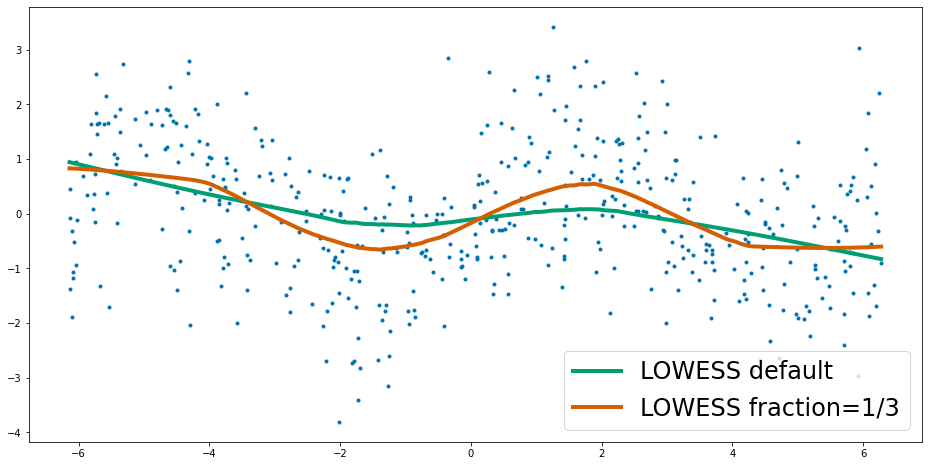

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x)
w = lowess(y, x, frac=1./3)
plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(*z.T, label='LOWESS default', linewidth=4)
plt.plot(*w.T, label='LOWESS fraction=1/3', linewidth=4)
_ = plt.legend(fontsize=24)

LOWESS Fraction = 0.05
 Out of Sample K-Folds MSE
 1.06993 1.40733 1.00322 1.22936 1.13626

LOWESS Fraction = 0.06
 Out of Sample K-Folds MSE
 1.06537 1.39075 0.99817 1.23577 1.10015

LOWESS Fraction = 0.07
 Out of Sample K-Folds MSE
 1.05805 1.39159 1.01092 1.25118 1.085

LOWESS Fraction = 0.08
 Out of Sample K-Folds MSE
 1.05454 1.38891 1.02018 1.2545 1.10129

LOWESS Fraction = 0.09
 Out of Sample K-Folds MSE
 1.04375 1.38135 1.02908 1.25412 1.11139

LOWESS Fraction = 0.1
 Out of Sample K-Folds MSE
 1.04421 1.36725 1.03168 1.25047 1.11862

LOWESS Fraction = 0.11
 Out of Sample K-Folds MSE
 1.04823 1.36495 1.02371 1.24498 1.12532

LOWESS Fraction = 0.12
 Out of Sample K-Folds MSE
 1.04994 1.36095 1.01929 1.24185 1.13017

LOWESS Fraction = 0.13
 Out of Sample K-Folds MSE
 1.05078 1.35465 1.01098 1.23897 1.13738

LOWESS Fraction = 0.14
 Out of Sample K-Folds MSE
 1.05743 1.35035 1.00717 1.23428 1.14555

LOWESS Fraction = 0.15
 Out of Sample K-Folds MSE
 1.06052 1.35106 1.01129 1.23157 1

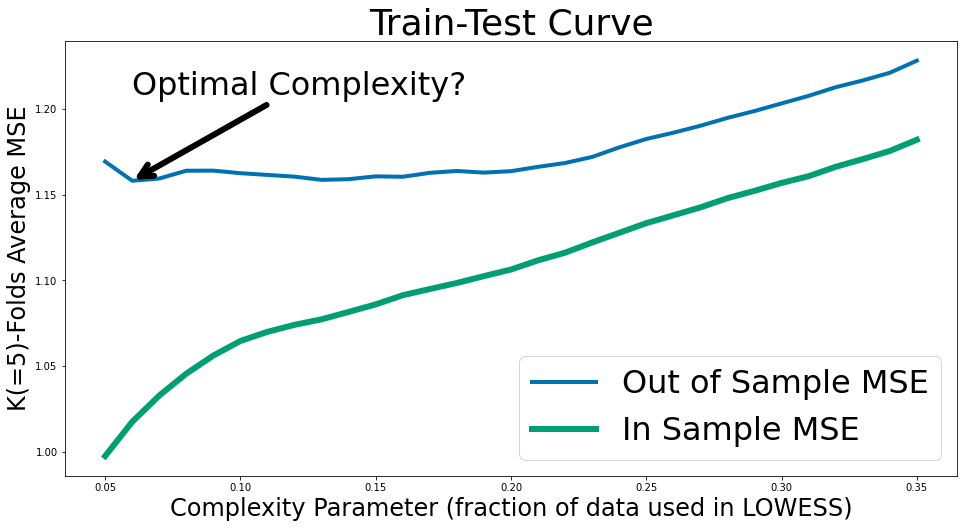

In [ ]:
kf = KFold(n_splits=5) # 3 and 10 are common alterntives
complexity_grid = np.linspace(0.05,0.35,31)
complexity_grid_average_KFoldsMSEs = []
complexity_grid_average_MSEs = []
for frac in complexity_grid:
  print("LOWESS Fraction =", str(np.round(frac,3)))
  print(" Out of Sample K-Folds MSE")
  KFoldsOutOfSampleMSEs=[]
  KFoldsInSampleMSEs=[]
  for train_index, test_index in kf.split(x[:,np.newaxis]):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xyhat = lowess(y_train, x_train, frac=frac)
    yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
    KFoldsOutOfSampleMSEs += [mean_squared_error(y_test, yhat(x_test))]
    KFoldsInSampleMSEs += [mean_squared_error(y_train, yhat(x_train))]
    print("",str(np.round(KFoldsOutOfSampleMSEs[-1],5)), end='')
  complexity_grid_average_KFoldsMSEs += [np.mean(KFoldsOutOfSampleMSEs)]
  complexity_grid_average_MSEs += [np.mean(KFoldsInSampleMSEs)]
  print("\n")

minMSE = np.min(complexity_grid_average_KFoldsMSEs)
optimal_complexity = complexity_grid[np.argmin(complexity_grid_average_KFoldsMSEs)]
plt.figure(figsize=(16,8))
plt.plot(complexity_grid, complexity_grid_average_KFoldsMSEs, 
         label='Out of Sample MSE', linewidth=4)
plt.plot(complexity_grid, complexity_grid_average_MSEs, 
         label='In Sample MSE', linewidth=6)
plt.xlabel('Complexity Parameter (fraction of data used in LOWESS)', fontsize=24)
plt.ylabel('K(=5)-Folds Average MSE', fontsize=24)
plt.title('Train-Test Curve', fontsize=36)
plt.annotate("Optimal Complexity?", xy=(optimal_complexity, minMSE), 
             xytext=(optimal_complexity, minMSE+0.05), 
             arrowprops=dict(arrowstyle="->", linewidth=6), fontsize=32)
_ = plt.legend(loc="lower right", fontsize=32)

GridSearchCV(estimator=lowess4sklearn(),
             param_grid={'frac': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35])},
             scoring='neg_mean_squared_error')
Optimal {'frac': 0.060000000000000005}


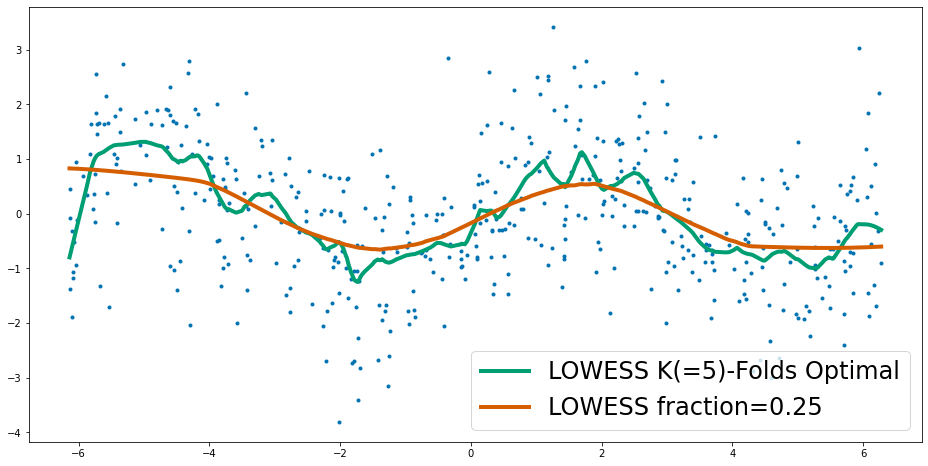

In [ ]:
# Or just...

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
parameters = {'frac': complexity_grid}
optimal_smoother = GridSearchCV(lowess4sklearn(), parameters, 
                                scoring='neg_mean_squared_error')
print(optimal_smoother.fit(x[:,np.newaxis], y))
print("Optimal", optimal_smoother.best_params_)

plt.figure(figsize=(16,8)); plt.plot(x,y,'.')
plt.plot(sorted(x),optimal_smoother.predict(sorted(x[:,np.newaxis])), 
         label='LOWESS K(=5)-Folds Optimal', linewidth=4)
w = lowess(y, x, frac=1./3); plt.plot(*w.T, label='LOWESS fraction=0.25', linewidth=4)
_ = plt.legend(fontsize=24)

# Although, to use the `sm.nonparametric.lowess` smoother it must be
# "scikit-learn compatible" as done below

In [ ]:
# https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator
from sklearn.base import BaseEstimator
class lowess4sklearn(BaseEstimator):

  def __init__(self, frac=0.5):
    self.frac = frac

  def fit(self, X, y):
    self.xyhat = lowess(y, X[:,0], frac=self.frac)
    return self.xyhat[:,1]

  def predict(self, X):
    yhat = interp1d(*self.xyhat.T, bounds_error=False, fill_value="extrapolate")
    return yhat(X)

  # https://scikit-learn.org/stable/developers/develop.html#get-params-and-set-params

  def get_params(self, deep=True):
      # suppose this estimator has parameters "alpha" and "recursive"
      return {"frac": self.frac}

  def set_params(self, **parameters):
      for parameter, value in parameters.items():
          setattr(self, parameter, value)
      return self

<a name="cell-f-dnn"></a>

## 5.3.5 Deep Neural Networks (DNNs) ([Return to TOC](#cell-TOC-f)) 

---

A Deep Neural Network (DNN) is a sequence of alternating transformations 

$$q_K \circ (A_K \{ \cdots \{q_2 \circ (A_2\{q_1 \circ (A_1x + b_1)\} + b_2)\} \cdots \} + b_K)$$

where $A_jx + b_j$ are ***affine transformations*** and $\{q_j\circ (A_jy_j + b_j)\}$ are [elementwise](https://math.stackexchange.com/questions/2324764/notation-for-element-wise-function-application) non-linear transformation of affine transformations; so, DNNs definte alternative applications of (a) affine transformations and (b) elementwise non-linearly transformations of the previous affine transformations. 

DNNs are the most flexible function approximation methodology available today. To get a sense of how flexible and powerful DNNs are, check out this [interactive webpage](https://arogozhnikov.github.io/3d_nn/). 

|||||
|-|-|-|-|
|![](https://drive.google.com/uc?id=1mPWLh1_DXT0sMyytV07cVe6mfbmIbxqc)|![](https://drive.google.com/uc?id=1IeLjer2rJ7sSi0zkE64kgEEXwNHzEyo7)|![](https://drive.google.com/uc?id=1v2GnmQg-CmQ46bbHsE7kalW8ukPpuhHY)|![](https://drive.google.com/uc?id=1vGK6al1eFQe-_rK306Jc3GNpBEWio_81)|
|![](https://drive.google.com/uc?id=1vJ4iTvdAXzZVQrJBkDdwIY72680G1bDR)|![](https://drive.google.com/uc?id=1fAVmPTzcux9eU2uauDU5VhirQL6IaAbO)|![](https://drive.google.com/uc?id=17AYwE9H9-2oGU52aIzhx5E87zmDc7YfM)|![](https://drive.google.com/uc?id=1btfBgFwi8ttA33h3T6KDIKP_NorEg55l)|

After completing this course you will be more than capable read about and understand [DNN theory](https://www.deeplearningbook.org/), as well as begin [coding and using DNN models](https://d2l.ai/).

<a name="cell-f-fourier"></a>

# 5.4 Fourier Series and Transforms ([Return to TOC](#cell-TOC-f)) 

---

Here are some quite compelling introductions to "Fourier stuff". 

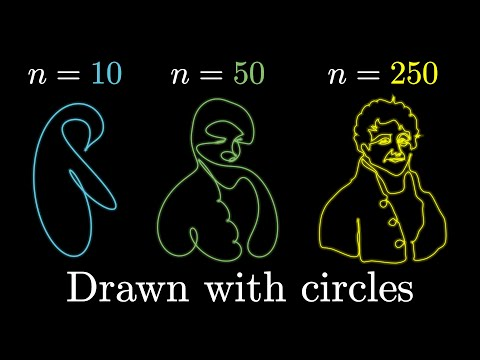

In [ ]:
# drawing automation (https://www.youtube.com/watch?v=r6sGWTCMz2k)
YouTubeVideo('r6sGWTCMz2k')

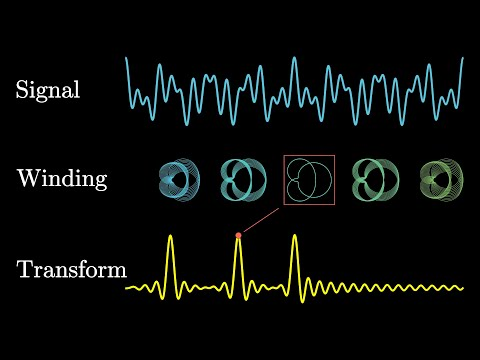

In [ ]:
# function decomposition (https://www.youtube.com/watch?v=spUNpyF58BY)
YouTubeVideo('spUNpyF58BY')

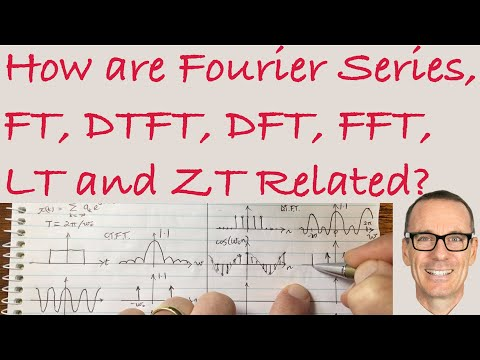

In [ ]:
# Fourier Flavors (https://www.youtube.com/watch?v=2kMSLqAbLj4)
YouTubeVideo('2kMSLqAbLj4')

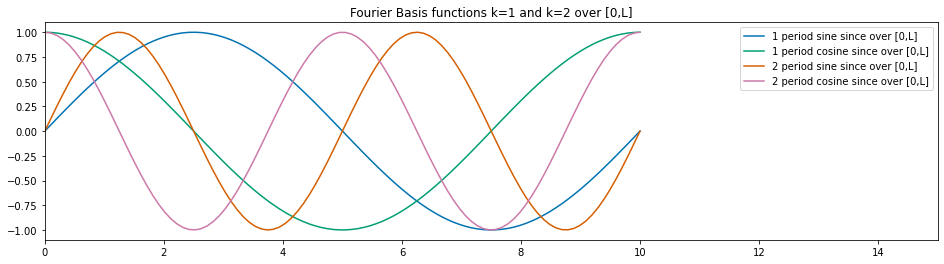

In [ ]:
L,m = 10,100
domain = np.linspace(0,L,m)
plt.figure(figsize=(16,4))
for k in [1,2]:
  plt.plot(domain, np.sin(domain*k/L*2*np.pi), label=str(k)+' period sine since over [0,L]')
  plt.plot(domain, np.cos(domain*k/L*2*np.pi), label=str(k)+' period cosine since over [0,L]')
plt.xlim(0,1.5*L)
plt.title('Fourier Basis functions k=1 and k=2 over [0,L]')
_=plt.legend()

<a name="cell-f-fourier-bases"></a>

## 5.2.0 Truncated Fourier Series Basis Expansions ([Return to TOC](#cell-TOC-f)) 

---

The canonical ***Fourier basis*** over an interval $x \in [0,L]$ uses ***basis functions*** of the form 

$$\sin\left(k \frac{x}{L} 2\pi\right) \text{ and } \cos\left(k \frac{x}{L}2\pi\right) \text{ for } k=1,2,...$$ 

where 
- $L$ scales $x$ so that $\frac{x}{L} \in [0,1]$ and $2 \pi k\frac{x}{L} \in [0,k(2\pi)]$ so that the input is natural for the ***sine-cosine*** domain 
- $k$ corresponds to a k-period ***sine-cosine*** function from $0$ to $L$ 

Approximations using ***truncated Fourier series basis expansions*** are thus

$$f(x) \approx c+\sum_{k=1}^d \left[ a_k \sin\left(k\frac{x}{L} 2\pi \right) + b_k \cos\left( k\frac{x}{L}2\pi\right) \right] \; = \sum_{k=-d}^d c_k e^{k\frac{x}{L}2\pi i}$$

where 

- both the ***sine-cosine basis***  and [equivalent](https://www.math24.net/complex-form-fourier-series)  ***exponential form*** with $i$ the ***imaginary number*** can be seen to be ***orthonormal basis*** under an ***inner product*** with a ***uniform*** (***normal***ized) ***weight function*** $w(x)$
- and the ***Fourier coefficients*** $c_k$ corresponding to the ***exponential form basis functions*** $e^{k\frac{x}{L}2\pi i}$ then are

  $${\overset{\text{complex inner product: complex conjugate of }e^{k\frac{x}{L}2\pi i}}{c_k = \langle f, b_k \rangle = \underset{w(x)}{\frac{1}{L}}\int_0^L f(x) e^{-k\frac{x}{L}2\pi i} dx}}$$

<!--
\quad \text{ or } \quad \overset{\text{interchangably when } k=-d,\cdots, d}{c_{-k} = \underset{w(x)}{\frac{1}{L}}\int_L f(x) e^{ikx\frac{2\pi}{L}} dx}
-->

So $e^{-k\frac{x}{L}2\pi i}$ extracts ***Fourier (series basis expansion) coefficients*** from $f(x)$ while $e^{k\frac{x}{L}2\pi i}$ [reconstructs](https://en.wikipedia.org/wiki/Fourier_inversion_theorem#Relation_to_Fourier_series) $f(x)$ as

$$\underset{\text{This is the }\textbf{Fourier inversion theorem}\text{ for Fourier series} }{f(x) =  \sum_{k=-\infty}^\infty \overbrace{\frac{1}{L}\int_0^L f(\tilde x) e^{-k\frac{\tilde x}{L}2\pi i} d\tilde x}^{c_k} \; e^{k\frac{x}{L}2\pi i}}$$

<!--
> or equivalently, since $k=-d,\cdots d$, 
> $e^{-i(-k)x}=e^{ikx}$ extracts ***Fourier (series basis expansion) coefficients*** from $f(x)$ while $e^{i(-k)x}=e^{-ikx}$ reconstructs $f(x)$.
-->

<a name="cell-f-fourier-transform-rational"></a>

## 5.4.1 Characteristic and Moment Generating Functions ([Return to TOC](#cell-TOC-f)) 

---

> Changing notations from $f(x)$ to $s(t)$ and replacing the basis index $k$ as the real-valued frequency $f$, the ***Fourier transform*** of signal $s(t)$ in the so-called ***time-domain*** $t \in {\rm I \! R}$ into the so-called ***frequency-domain*** $f \in {\rm I \! R}$
>
>$$\underset{\text{$f \in {\rm I \! R}$ (as opposed to $f \in \mathbb{Z}$)}}{\mathcal F\{s\}(f) = \int_{\rm I \! R} s(t) e^{-t(f)2\pi i} dt}$$
>
> is a continuous function analog of the ***Fourier coefficients***; namely, $\mathcal F\{s\}(f)$ is a function which creates ***Fourier coefficients*** calculations for every possible continuous value of $f$.
>
> - Notice that the $\frac{1}{L}$ scaling of the ***Fourier series*** is no longer included since $t$ is no longer on the restricted domain $L$. The frequency $f$ could be viewed as simply replacing $\frac{k}{L}$.

> The ***Fourier transform*** is the continuous analog of the ***Fourier series***.  Both frameworks integrate with respect to the continuous domain of the function as part of the ***inner product*** to produce their ***Fourier coefficients***; but, the ***Fourier transform*** creates ***Fourier coefficients*** with respect to a ***continuously infinite basis*** $\{e^{t(f)2\pi i}: f \in {\rm I \! R}\}$ as opposed to a ***discretely infinite basis*** $\{e^{k\frac{x}{L}2\pi i}: k \in {\rm I \! N}\}$. Thus, the ***Fourier transform inversion theorem*** must reconstruct the function using integration rather than summation. 

Reparameterizing as $t=-2 \pi f$, the ***Fourier transform*** of ***probability density function*** $f_Y$ is seen to be the ***characteristic function*** 
$$\varphi_{Y}(t) = \int_{\rm I \! R} f_Y(y) e^{ity} dy = E_Y[e^{ity}]$$

where, analagously to the inversion theorem for ***Fourier Series***, $e^{ity}$ provides the ***Fourier transform*** $\mathcal F$ while $e^{-ity}$ provides the ***inverse Fourier transform*** $\mathcal F^{-1}$ in the [***inversion theorem***](https://en.wikipedia.org/wiki/Fourier_inversion_theorem)

$$\underset{\text{(this is the theorem, not the proof of the theorem)}}{f_Y(y^\vphantom{1pt}) =  \int_{\rm I \! R} \varphi_Y(t) e^{-it y} dt=  \int\!\!\!\!\int_{\rm I \! R^2} f_Y(y) e^{it(\tilde y - y)} d \tilde y dt  }$$


Since the ***characteristic function*** of density $f_Y$ is the one-to-one ***Fourier transform*** of $f_Y$, this transformation is a ***dual*** (alternative representation) of $f_Y$. For density functions $f_Y$ and $f_X$ of independent random variables $Y$ and $X$ the ***dual space*** is convenient since

$$\varphi _{Y+X}(k) = E\left[e^{it(X+Y)}\right] = E\left[e^{itX}e^{itY}\right] \overset{X \perp\!\!\!\perp Y}{=} E\left[e^{itX}\right]E\left[e^{itY}\right] =  \varphi _{Y}(t)\varphi _{X}(t)$$

|$\log$ ***transform***|***characteristic function***|
|:-:|:-:|
|$\times \rightarrow +$| $+ \rightarrow \times$|
| make visual scale interpretable | $\varphi _{Y}(t)\varphi _{X}(t)$ is recognizable| 
| improve modeling assumptions |  when $f_Y(x)+f_X(x)$ isn't|
| improve numerical computations |  |


The ***moment generating function*** $M_X(k) = \varphi _{X}(-ik)$ is a ***(bilateral) Laplace transform*** of density $f_X$

$$M_X(k) = \int e^{kx} f_X(x) dx = E_X[e^{kx}]$$

> By replacing $e^{kX}$ with it's [Taylor series expansion around 0](#cell-FPN-dense-taylor), the celebrated titular result follows since
>
>\begin{align*}
\frac{d^n}{dk^n}E\left[e^{kX}\right] = & {} \frac{d^n}{dk^n} E\left[e^{k_0X} + Xe^{k_0X}(k-k_0) + \frac{X^2e^{k_0X}}{2}(k-k_0)^2 + \frac{X^3e^{k_0X}}{3!}(k-k_0)^3 + \cdots\right] \\
= & {} \frac{d^n}{dk^n} \left[ 1 + kE\left[X\right] + \frac{k^2}{2}E\left[X^2\right] + \frac{k^3}{3!}E\left[X^3\right] + \cdots \right] = E\left[X^n\right] + k(\cdots)
\end{align*}
> 
> so the $n^{th}$ ***raw moment*** 
>
> $$E[X^n] = \int x^n f_X(x) dx = \frac{d^n}{dk^n}M_X(k)|_{k=0}$$
>
> If the above integral is not tractible, then transforming to the ***moment generating function*** is convenient since 
>
> $$\text{integration } {E[X^n]} \quad \overset{\text{changes to}}{\longrightarrow} \quad \text{differentiation } {\frac{d^n}{dk^n}M_X(k)|_{k=0}} $$

<a name="cell-f-fourier-convolution-theorem"></a>

## 5.4.2 The Convolution Theorem ([Return to TOC](#cell-TOC-f)) 

---

For the independent continuous random variables $X$ and $Y$, the density $f_{Z=X+Y}(z=x+y)$ is the ***convolution*** of $g_X$ and $h_Y$

$$f_{X+Y}(z) = \int g_X(t) h_Y(z-t) dt = (g_X*h_Y)(z) $$ 

where the $(g_X*h_Y)(z)$ notation hints that, rather than considering the density $f_{X+Y}$ of the summed random variables, the product $\varphi _{Y+X}(k) = \varphi _{Y}(t)\varphi _{X}(t)$ of their ***dual characteristic functions*** will instead be used on the basis of the ***inverse theorem*** seen above

$$
\begin{align*}
f_{X+Y}(z) = {} & \int \varphi_{X+Y}(p) e^{-izp} dp \\
= {} & \int \varphi_X(p)\varphi_Y(p) e^{-izp} dp  
\end{align*}$$

The use of the $\varphi _{Y+X}(k) = \varphi _{Y}(t)\varphi _{X}(t)$ identity in the context of the ***inverse theorem*** is more generally known as the [***convolution theorem***](https://www.tf.uni-kiel.de/matwis/amat/math_for_ms/kap_1/backbone/r_su25.html)


$$
\begin{align*}
\mathcal F \{g_X*h_Y\}(p) = {} & \mathcal F \{g_X \}(p) \cdot \mathcal F \{h_Y \}(p)\\
f_Z(z) = (g_X*h_Y)(z) = {} & \mathcal F^{-1} \{ \mathcal F \{g_X \}(p) \cdot \mathcal F \{h_Y \}(p)\} (z)
\end{align*}$$

<!--
= {} & \int \left(\int g_X(x) e^{-2\pi ixp} dx \int h_Y(y) e^{-2\pi iyp} dy\right) e^{2\pi izp} dp\\
\overset{\text{Integral order doesn't matter}}{\text{by Fubini's theorem}} \Longrightarrow \quad = {} & \int g_X(x) \int h_Y(y) \underset{0 \text{ unless } z=x+y }{\int e^{2\pi ip(z-x-y)}  dp}\,dy\,dx\\
 = {} & \int \left( \int g_X(t) e^{-2\pi i(z-t)p} h_Y(z-t) e^{-2\pi itp} dt \right) e^{2\pi izp} dp\\
= {} & \int \left( \int g_X(t) h_Y(z-t) dt \right) dp = \int g_X(t) h_Y(z-t) dt 
-->

<a name="cell-f-fourier-convolution-theorem-circular"></a>

## 5.4.3 "Circular" Convolutions ([Return to TOC](#cell-TOC-f)) 

---

To compute the ***convolution*** of standard normal random variables $X$ and $Y$ it is natural to consider only a substantive interval density such as 

```python
t0,epsilon = 3,0.01; support = np.arange(-t0,t0,epsilon)
g_X = stats.norm().pdf(support); h_Y = stats.norm().pdf(support)
```

Then, with $t_0=\frac{n}{2}\epsilon$ and $g_X[j] \equiv g_X(-t_0+j\epsilon)$ and $h_Y[j] \equiv h_Y(-t_0+j\epsilon)$ for $j=0,1,\cdots, n-1$, it seems intuitive to approximate 

$$f_{X+Y}(z=-t_0+k\epsilon)=\int_{\rm I \! R} g_X(t) h_Y(z-t) dt \approx \int_{-t_0}^{t_0} g_X(t) h_Y(z-t) dt \approx \sum_{j=0}^{n-1} \epsilon \underset{}{g_X[j]h_Y\!\left[k-j\right]}$$

with the [***Riemann sum approximation***](https://en.wikipedia.org/wiki/Riemann_sum) for the ($\epsilon$-width) discrete approximations `g_X` and `h_Y`. 
This does not quite work though because $h_Y[\cancel{k}^0\!\!-j]$ is not defined for $j>1$ in the `h_Y` numerical version of $h_Y$.

This can be addressed with the so-called [***circular***](https://stackoverflow.com/questions/28468307/scipy-ndimage-filters-convolve-and-multiplying-fourier-transforms-give-different/28469015#28469015) specification which

- defines $h_Y[-j] \equiv h_Y[n-j]$ (as in `python`)
- ***zero-pads*** ${h_X^{0pd}}[j'] = 0$ for $j'=n,\cdots, 2n-1$ with $n$ zeros

thus allowing the evaluation

$$\underset{k=0,1,\cdots,n-1}{\tilde f_{X+Y}[k]} \equiv \tilde f_{X+Y} \left(z=-t_0+k\epsilon\right) \approx \sum_{j=0}^{n-1} \underset{}{g_X[j]{h_Y^{0pd}\!\left[n+k-j\right]}} \quad \longleftarrow \quad \epsilon \text{ ignored and $\tilde f_{X+Y}$ normalized later}$$

where the $n$ offset means $h_Y^{0pd}\!\left[n+k-j\right] = h_Y\!\left[k-j\right]$ for $k<j$ and is $0$ otherwise.

- $f_{X+Y}$ is ***normalized*** as

  $$f_{X+Y} = \frac{\tilde f_{X+Y}}{\epsilon  \sum_{j=0}^{n-1}\textstyle \tilde f_{X+Y}[j]}$$

  so that $f_{X+Y}$ is a "histogram" that [approximates a density](https://en.wikipedia.org/wiki/Riemann_sum) where each $f_{X+Y} [j]$ is the height of a "bin" of width $\epsilon$ and $\sum_{j=0}^{n-1}\textstyle \epsilon f_{X+Y}[j] = 1$

- Without sufficient padding `h_Y` will incorrectly "recycle" during the ***convolution*** and not behave as intended when used. 



In [4]:
x = np.linspace(-3,3,100)
g_X = stats.norm().pdf(x).tolist()
h_Y = g_X
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(g_X,linewidth=4, label='$g_X[j]$')
for z in range(0,80,20):
  ax[0].plot(g_X[z::-1]+h_Y[-1:z:-1],label="$h_Y[$"+str(z)+"-j]")
ax[0].legend(); ax[0].set_xlabel('$j$')
ax[0].set_title('Without Zero-Padding: Weird "Double Convolution" for "Circular" Fourier Transform')

# Zero-Padding
g_X += [0]*99
h_Y = g_X
ax[1].plot(g_X,linewidth=4, label='$g_X[j]$')
for z in range(0,100,25):
  ax[1].plot(g_X[z::-1]+h_Y[-1:z:-1],label="$h_Y[$"+str(z)+"-j]")
ax[1].legend(); ax[0].set_xlabel('$j$')
_=ax[1].set_title('With Zero-Padding: Correct "Full Convolutional Sweep" for "Circular" Fourier Transform')

<a name="cell-f-fourier-transform"></a>

## 5.4.4 Discrete Fourier Transform (DFT) ([Return to TOC](#cell-TOC-f)) 

---

> The ***Fourier coefficients*** of the ***Fourier series*** for integer $j$ are
> $$c_j = \langle f, b_j \rangle = \underset{w(x)}{\frac{1}{L}}\int_0^L f(x) e^{-j\frac{x}{L}2\pi i} dx$$
> and (changing notation) for signal $s(t)\equiv f(x)$ and real-valued frequency $f$ replacing $\frac{j}{L}$ the ***Fourier Transform*** is
> $$\underset{\text{$f \in {\rm I \! R}$ (as opposed to $f \in \mathbb{Z}$)}}{\mathcal F\{s\}(f) = \int_{\rm I \! R} s(t) e^{-t(f)2\pi i} dt}$$
> Thus, if $k$ from $0$ to $n-1$ indexes over a discrete representation of the continuous signal as $s[k] = s(t_0+\epsilon k)$ and $f=\frac{j}{n}$ for $j$ from $0$ to $n-1$ then the discrete sum (proportional) approximation to the integration of the ***Fourier transform*** is 
> $$\tilde x_j = \sum_{k=0}^{n-1} s[k]\, e^{-k\left(\frac{j}{n}\right) 2\pi i}$$
> This then is how the ***Fourier transform*** of a discrete representation of a function is computed. 
> - The collection of $\{\tilde x_j: j=0,\cdots,n\}$ are thus ***Fourier coefficients*** of a specific ***Fourier basis***, but where integration computation is (proportionally) approximated. 
> The original $s[j]$ can then be reconstructed in the ***Fourier series*** manner from the ***Fourier basis*** as
> $$s[k] = \sum_{j=0}^{n-1} \tilde x_j\, e^{k\left(\frac{j}{n}\right) 2\pi i}$$

The ***Discrete Fourier Transform*** (DFT) transforms an n-vector $x$ (indexed as $s[k]$ above) into a new n-vector whose $j^{th}$ element is a linear comination of the elements $x$ defined by the ***truncated discretized Fourier series***

$$\tilde x_j = \underbrace{\sum_{k=0}^{n-1} x_k e^{-k\left(\frac{j}{n}\right) 2\pi i}}_{\overset{\text{discrete version of}}{\int x(k) e^{ -k (j/n) 2\pi i } dk}} = \underbrace{\overbrace{\left[1, e^{-\left(\frac{j}{n}\right) 2\pi i}, e^{-2\left(\frac{j}{n}\right) 2\pi i}, \cdots, e^{-(n-1)\left(\frac{j}{n}\right) 2\pi i} \right]}^{\textit{discretized } \text{basis function } e^{-k\left(\frac{j}{n}\right) 2\pi i}, \;  k\,=\,0,\,\cdots,\,n-1}}_{\text{is orthogonal to analogously discretized } e^{-k'\left(\frac{j}{n}\right) 2\pi i}} \left[\begin{array}{c}x_0\\\vdots\\x_{n-1}\end{array}\right] \quad \text{or} \quad \underset{\text{just a matrix multiplication}}{\overset{\text{just a linear transformation}}{\tilde x = Ax, \quad A_{jk} = e^{-k\left(\frac{j}{n}\right) 2\pi i}}}$$

The ***Inverse Discrete Fourier Transform*** (IDFT) is

$$ x_j = \underbrace{\sum_{k=0}^{n-1}  \tilde x_k \frac{1}{n} e^{k\left(\frac{j}{n}\right)2\pi i}}_{\overset{\text{discrete version of}}{\int x(k) e^{ k (j/n) 2\pi i } dk}} = \underbrace{\overbrace{\frac{1}{n} \left[1, e^{\left(\frac{j}{n}\right) 2\pi i}, e^{2\left(\frac{j}{n}\right) 2\pi i}, \cdots, e^{(n-1)\left(\frac{j}{n}\right) 2\pi i} \right]}^{\textit{discretized } \text{basis function } \frac{1}{n}e^{k\left(\frac{j}{n}\right) 2\pi i}, \;  k\,=\,0,\,\cdots,\,n-1}}_{\text{will be orthogonal to analogously discretized } \frac{1}{n}e^{k'\left(\frac{j}{n}\right) 2\pi i}} \left[\begin{array}{c}\tilde x_0\\\vdots\\\tilde x_{n-1}\end{array}\right] \quad \text{or} \quad \underset{\text{just a matrix multiplication}}{\overset{\text{just a linear transformation}}{x = A^{-1}\tilde x, \quad A^{-1}_{jk} = \frac{1}{n}e^{k\left(\frac{j}{n}\right) 2\pi i}}}$$

where $A^{-1}A = AA^{-1} = I$ since 

$$\frac{1}{n} \sum_{k=0}^{n-1} e^{k\left(\frac{j-j'}{n}\right) 2\pi i }
 = \left\{ \begin{array}{l}1\text{ for }j=j'\\0 \text{ otherwise}\end{array} \right.$$

since (as [shown here](https://math.stackexchange.com/questions/2413218/proof-of-orthonormality-of-basis-of-dft)) the [geometric series](https://en.wikipedia.org/wiki/Geometric_series#Closed-form_formula) $\sum_{k=0}^{n-1} r^k = \frac{1-r^n}{1-r} = 0$ for $r=e^{\left(\frac{j-j'}{n}\right) 2\pi i}$ as a result of ***Euler's identity*** $e^{2\pi i}=1$; although, more generally, if two functions are ***orthogonal*** then their evaluations over a regular grid 
(i.e., discritized vector versions of the functions) will also be ***orthogonal*** (*as noted on page 168 and 178 in Chapter 4.3 **Orthogonal Polynomials** of James E. Gentle's **Computational Statistics** textbook*).

> The DFT performs of ***change of basis*** for vectors $x \in {\rm I \! R}^d$ to a ***discretized Fourier basis***.  The ***Fourier coefficients*** $\tilde x_j$ are computed as the [***inner (dot) products***](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition) of the input vector $x$ with the ***discretized Fourier basis vectors*** $\{A_{k \cdot}: k=1,\cdots,n\}$
>
> $$\tilde x_j = A_{j \cdot}^Tx = \cos(\theta_{A_{k \cdot}x}) \cancel{||A_{k \cdot}||_2}^n ||x||_2$$
>
> which is larger for larger magnitude $x$ and when the angle between the discretized Fourier basis function $A_{k \cdot}$ and the input vector $x$ is small so $\theta_{A_{k \cdot}x} \approx 0$ and $\cos(\theta_{A_{k \cdot}x}) \approx 1$.

> > $A$ is ***symmetric*** and $U = \frac{1}{\sqrt(n)}A$ is [***unitary***](https://en.wikipedia.org/wiki/Unitary_matrix) which means $U^{-1}$ is the [***conjugate transpose (adjoint matrix)***](https://en.wikipedia.org/wiki/Conjugate_transpose) of $U$
> >
> >$$U^{-1} = U^* = U^H = \overline{U^T} = U^\dagger \quad \text{ and } \quad \frac{1}{n}A^*A = \frac{1}{n}AA^* = I$$
> >
> > In complex number contexts, [***muliplicative inverses***](https://en.wikipedia.org/wiki/Multiplicative_inverse#Complex_numbers) can be quickly derived from [***complex conjugates***](https://en.wikipedia.org/wiki/Complex_conjugate), an example of which is $A^{-1} = \frac{1}{n}A^*$ above.

In [5]:
plt.figure(figsize=(10,5))

n = 10
A = np.array([[np.exp(2*np.pi*1j*i*k/n) for i in range(n)] for k in range(n)])
grid = np.array([2*np.pi*i/n for i in range(n)])
plt.plot(grid, np.real(A[0,:]), 'k.', markersize=10, label='discretized')
for i in range(1,5):
  plt.plot(grid, np.real(A[i,:]), 'k.', markersize=10)

n = 500
grid = np.array([2*np.pi*i/n for i in range(n)])
A = np.array([[np.exp(2*np.pi*1j*i*k/n) for k in range(n)] for i in range(n)])
plt.plot(grid, A[0,:], label='basis functions', zorder=-1)
for i in range(1,5):
  plt.plot(grid, np.real(A[i,:]), zorder=-1)

plt.title("Fourier Basis Functions $e^{jk\\left(\\frac{2 \\pi i}{n}\\right)}$ for $k=0,1,2,3,4$", 
          fontdict={'fontsize': 24})
_ = plt.legend(fontsize=16)

In [5]:
# here are the limits of precision
print("exp(pi*i) is -1:", np.exp(np.pi*1j))
print("exp(2*pi*i) is 1:", np.exp(np.pi*2j), end='\n\n')

# the rows of A are indeed orthogonal
n = 3
A = np.array([[np.exp(2*np.pi*1j*j*k/n) for j in range(n)] for k in range(n)])
print("A =\n", np.round(A,3), end='\n\n')
print("Aconj(A.T) is orthogonal\n", np.round(A@np.conj(A.T),3), end='\n\n')
# or Aconj(A) also equals cI since A is symmetric

# and the inverse is indeed exactly as specified
Ainv = (1/n)*np.array([[np.exp(-2*np.pi*1j*j*k/n) for k in range(n)] for j in range(n)])
print("A^-1 =\n", np.round(Ainv,3) , end='\n\n')
print("A^-1A = AA^-1 = I\n", np.round(A@Ainv,3), "\n\n", np.round(Ainv@A,3))
# U=A/sqrt(n) is a unitary matrix U^*U=UU^*=I
# https://en.wikipedia.org/wiki/Unitary_matrix
# So U^-1 is conj(U) = U^*
# https://en.wikipedia.org/wiki/Conjugate_transpose

In [5]:
# so we can do a DFT of a vector x
x = np.ones((n,1))
print("x =\n", x, end='\n\n')
DFT_x = A@x
print("DFT(x) =\n", np.round(DFT_x,3), end='\n\n')

# and recover x with the IDFT
IDFT_DFT_x = Ainv@DFT_x
print("IDFT(DFT(x)) =\n", np.round(IDFT_DFT_x,3))

<a name="cell-f-fourier-transforms"></a>

## 5.4.5 Transformation Applicability ([Return to TOC](#cell-TOC-f)) 

---

From a computational perspective, the benefits of solving a problem in a transformed space must outweigh the cost of solving the problem original space plus the computational overhead (and perhaps loss of accuracy) of transformation into the new space.

The DFT is an $O(n^2)$ matrix-vector multiplication operation which is a very expensive operation for large $n$. 

> I.e., a vector of length $n$ is multipled by $n$ other vectors of length $n$, for a total of $n \times n = n^2$ multiplications; and each of the $n$ elements resulting from the $n$ multiplications must be added together, for a total of $(n-1) \times (n-1) = O(n^2)$ additions.

It turns out that the special matrix forms of $A_{jk} = e^{-k\left(\frac{j}{n}\right) 2\pi i}$ and $A_{jk}^{-1} = e^{k\left(\frac{j}{n}\right) 2\pi i}$ of the DFT admit an extremely efficient $O(n \log(n))$ shortcut for computing the matrix-vector multiplication.  Using the $O(n \log(n))$ strategy to compute the DFT is (appropriately) called the ***Fast Fourier transform (FFT)***.

> Since $O(n \log(n))$ not nearly as computationally prohibitive as $O(n^2)$, working in terms of ***Fourier transforms*** (via the FFT) is actually an extremely attractive computational option whevener solving a problem in ***Fourier space*** is more efficient than solving the problem in the original space.
>
> E.g., the density of the random variable $Z$ that is the sum of independent $X\sim g_X(x)$ and $Y\sim h_Y(y)$ can be evaluated over the grid $z_0, z_1, \cdots, z_n$ by
>
>1. [Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum) approximation of the ***convolution*** integral 
>
>  $$\begin{align*}
f_{Z=X+Y}(z_j) = (g_X * h_Y)(z_j) ={}&\int_{z_0}^{z_{n-1}=z_0+(n-1)\epsilon} \!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!g_X(t)h_Y(z_j-t) dt \\ 
\approx {}& \underset{}{{\sum_{k=0}^{n-1} \epsilon g_X(z_0+\epsilon k)h_Y(z_j - (z_0+\epsilon k))}} 
\end{align*}$$
>
>  is $O(n^2)$ 

|each (of $n$)| $z_j=z_0+j\epsilon$ requires |
|:-|:-|
|$n$ | subractions|
|$n$|evaluations of $f_X$|
|$n$|evaluations of $g_Y$|
|$n$| multiplications (when $\epsilon$ is ignored)|
|$n/2-1$| additions for normalization constant|
|$n/2$| divisions to normalize|

>2. Discrete approximation of the [***convolution theorem***](https://en.wikipedia.org/wiki/Convolution_theorem)
>
>  $$\begin{align*}
f_{Z=X+Y}(z) = (g_X * h_Y)(z) ={}& \mathcal F^{-1}(\mathcal F(g( z)) \circ \mathcal F(h(z)))\\
\approx {}& {\mathcal F^{-1}(\mathcal F(g(\{z_0 \cdots z_{n-1}\})) \circ \mathcal F(h(\{z_0 \cdots z_{n-1}\})))}
\end{align*}$$
>
>  is $O(n \log(n))$

| | |
|:-:|-|
| $f_X$ |$n$ evaluations  |
| $g_Y$ |$n$ evaluations |
|$\mathcal F \{f_X\}$|$O\big( n \log (n) \big)$ FFT |  
|$\mathcal F \{g_Y\}$|$O\big( n \log (n) \big)$ FFT |  
| $\circ$ |$n$ elementwise multiplications |
|$\mathcal F^{-1} \{\cdot \}$|$O\big( n \log (n) \big)$ IFFT |  

> - This computational trade off, along with the implementation of the FFT (as defined in the following sections) will be considered further in the [Week 5 Programming Homework](#cell-f).

<a name="cell-f-fourier-nthroots"></a>

## 5.4.6 Primitive $n^{th}$ Roots of Unity ([Return to TOC](#cell-TOC-f)) 

---

The efficient $O(n \log(n))$ FFT calcuation is (unsurprisingly, given the complexity class) based on a ***recursive*** *divide and conquer* formulation. This in turn, however, is based upon the properties of ***discretized Fourier bases*** as ***primitive $n^{th}$ roots of unity***.

0. Let $\tilde x_x(w_k)$ be the ***$w_k$ monomial basis representation*** of the polynomial $\tilde x_k$ 

\begin{align*}\tilde x_x(w_k) & = {} \sum_{j=0}^{n-1} x_{j} w^{j}_k \quad \text{where} \quad w_k = e^{-2 \pi i\frac{k}{n}}\\
  & = {} \tilde x_k \quad \text{(the $k^{th}$ element of the DFT of $x$)} \end{align*}

1. The $w_k = e^{-2 \pi i\frac{k}{n}}$ (for $k=1,\cdots,n-1$) are ***primitive $n^{th}$ roots of unity*** since

  $$\underset{\Rightarrow \text{ Euler's identity } e^{2 \pi i} + e^{\pi i} = 1-1 = 0}{\underbrace{w^n_k = (e^{2 \pi i})^{-k} = 1^{-k} = 1}_{\text{Euler's formula } e^{y i} = \cos(y) + i \sin(y)}}$$

  and $n$ is the lowest (i.e., ***primitive***) power of $w_k$ which equals $1$ (***unity***); hence, $w_k$ are a "***primitive $n^{th}$ roots of unity***".

2. For even integer $n = 2m$, ***primitive $n^{th}$ roots of unity*** $z_k$ satisfy

   $$z_k^j = -z_k^{j+m} \quad \text{ and hence } \quad z_k^j = z_k^{j+n} \quad \text{ and } \quad (z_k^2)^j = (z_k^2)^{j+m}$$

  which also means that $z_k^2$ are ***primitive $m^{th}$ roots of unity*** (since $m$ is the lowest power of $z_k^2$ such that $(z_k^2)^{m}=1$ since $n$ is the lowest power of $z_k$  such that $z_k^n=1$).

  For $z_k=w_k$ then
  - $w_k^2$ are ***primitive $m^{th}$ roots of unity***
  
  and $w_k^j = -w_k^{j+m}$ confirms the previously demonstrated [geometric series proof](https://math.stackexchange.com/questions/2413218/proof-of-orthonormality-of-basis-of-dft) that $\sum_{j=0}^{n-1} w^j_k = 0$.


|![](https://upload.wikimedia.org/wikipedia/commons/3/3a/3rd-roots-of-unity.png) | ![](https://upload.wikimedia.org/wikipedia/commons/5/56/8th-root-of-unity.jpg)|![](https://www.researchgate.net/profile/Chengzhi-Shi-2/publication/263237071/figure/fig2/AS:614119153627153@1523428824479/Example-plots-of-the-distinct-Nth-roots-of-unity.png)|
|-|-|-|


<!--
\underset{0 = e^{\pi i} + 1 = (e^{2m \pi i/n} + e^{2 \pi i n/n})^{jk}}{\underbrace{
  }_{\text{by Euler's identity}}}
-->

  > Other examples of ***primitive $n^{th}$ of roots unity*** $z_k$ are
  > 1. $z_1 = -1$ for $n=2$ since $z_1^n = (-1)^2 = 1$ and
  > \begin{align*}
  \sum_{j=0}^{1} {-1}^j & = {} 0
  \end{align*}
  > 2. $z_k = i^k$ for $n=4$ and $k=1$ and $k=3$ (but not $k=2$) since $z_k^4 = (i^k)^4 = (i^4)^k = 1^k = 1$ and
  > \begin{align*}
  \sum_{j=0}^{3} z_1^j = & {} \sum_{j=0}^{3} i^j = 1 + i - 1 - i = 0 \\
  \cancel{\sum_{j=0}^{3} z_2^{j}} = & {} \cancel{\sum_{j=0}^{3} i^{2j}} = \cancel{1 - 1 + 1 - 1 } = 0 \\
  \sum_{j=0}^{3} z_3^{j} = & {} \sum_{j=0}^{3} i^{3j} = 1 - i - 1 + i = 0 
  \end{align*}
  >
  > where the alternating patterns seen in the summations are a result of the $z_k^j = -z_k^{j+m}$ property of ***primitive $n^{th}$ of roots unity***.
  >


<a name="cell-f-fourier-fft"></a>

## 5.4.7 Fast Fourier Transform (FFT) ([Return to TOC](#cell-TOC-f)) 

---

Returning to the DFT specification, for even integer $n = 2m$

\begin{align*}\tilde x_k = \tilde x_x(w_k) = & {} \sum_{j=0}^{n-1} x_{j} w^{j}_k \\
     = & {} \quad\;\;\; x_{n-1} w^{n-1}_k + x_{n-3} w^{n-3}_k + \cdots + x_3 w_k^3 + x_1 w_k\\
       & {} \;\; + \; x_{n-2} w^{n-2}_k + x_{n-4} w^{n-4}_k + \cdots + x_2 w_k^2 + x_0\\
     = & {} \; w_k\left(x_{n-1} w^{n-2}_k + x_{n-3} w^{n-4}_k + \cdots + x_3 w_k^2 + x_1 \right)\\
       & {} \;\; + \left(x_{n-2} w^{n-2}_k + x_{n-4} w^{n-4}_k + \cdots + x_2 w_k^2 + x_0 \right) \\
     = & {} \; w_k\left(x_{n-1} y^{m-1}_k + x_{n-3} y^{m-2}_k + \cdots + x_3 y_k+ x_1 \right)\\
       & {} \;\; + \left(x_{n-2} y^{m-1}_k + x_{n-4} y^{m-2}_k + \cdots + x_2 y_k + x_0 \right), \; \text{for } y_k = w_k^2 \\
       = & {} \; w_k \tilde x_{x_{\text{odd}}}(y_k) + \tilde x_{x_{\text{even}}}(y_k)
   \end{align*}

so 

\begin{align*}
     \tilde x_x(w_k) = & {} \;\; w_k \,_{\,} \tilde x_{x_{\text{odd}}}(w_k^2) + \tilde x_{x_{\text{even}}}(w_k^2), \quad \text{ for } k=0, \cdots, m-1 \\
   \text{but then} \quad  \tilde x_x(w_{k+m}) = & {}  \underbrace{-w_k}_{w_{k+m}} \tilde x_{x_{\text{odd}}}(w_{k}^2) + \tilde x_{x_{\text{even}}}(w_k^2), \quad \text{ for } k=0, \cdots, m-1 \\
   \end{align*}

since $w_{k+m} = -w_k$ for $k=0, \cdots, m-1$ for $w_k$  ***primitive $n^{th}$ roots of unity***, and the process continues recursively since $w_k^2$ are ***primitive $m^{th}$ roots of unity***.

Now here's what's happened: 

0. $\tilde x_{x_{\text{odd}}}(w_k^2)$ and $\tilde x_{x_{\text{even}}}(w_k^2)$ are just reused between the first and second halfs of $\tilde x$ computations with the only change being a negative sign in $\tilde x_x(w_{k+m})$.

1. The orginal calculation based on the $n$ dimensional $x$ now only requires two calculations of size $m=n/2$, i.e., $x_{\text{odd}}$ and $x_{\text{even}}$, but these two "half problems" produce the solution to the original size $n$ problem.

2. This ***divide and conquer recursion*** provides [$O(n \log(n))$ complexity](https://math.stackexchange.com/questions/1704788/complexity-of-fft-algorithms-cooley-tukey-bluestein-prime-factor) since 

  - there are $\log_2(n) = O(\log(n))$ recursion levels since this is the number of times the data can be split in half 
  - and at each recursion level there are $n$ of the $\tilde x_k$ to be computed, i.e., $\tilde x_x(w_k)$ and $\tilde x_x(w_{k+m})$ for $k=0, \cdots, m-1$, each requiring 4 operations
    - squaring $w_k^2$ (for the subsequent recursion level), one multiplication with $w_k$ and $\tilde x_{x_{\text{odd}}}(w_k^2)$ added and subtracted from $\tilde x_{x_{\text{even}}}(w_k^2)$
    - but $\tilde x_{x_{\text{odd}}}(w_k^2)$ and $\tilde x_{x_{\text{even}}}(w_k^2)$ themselves don't add any operations because their computation  returned from the subsequent recursion level.

> - For full recursion with the algorithm above the dimension of $x$ must be $n=2^k$ so that the $x$ vector can be split in two at each recursion.  For a more general presentation of the ***FFT*** applicable to arbitrary $n$ on the basis of ***zero-padding***, please see Keith Knight's STA410 [notes3.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222618) document.
>
> - ***DFT/FFT*** (and ***Fourier transforms and series***) work for both real and complex value functions (and vectors, in the case of ***DFT/FFT***).